In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
raw = pd.read_excel('World_development_mesurement.xlsx')
raw

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  \
0         $54,790,058,957             0.035               $60   
1          $9,129,594,819             0.034               $22   
2          $2,359,122,303             0.043               $15   
3          $5,788,311,645             0.047              $152   
4          $2,610,959,139             0.051               $12   
...                   ...               ...               ...   
2699                  NaN               NaN               NaN   
2700  $16,244,600,000,000             0.179            $8,895   
2701      $50,004,354,667             0.089            $1,308   
2702     $381,286,223,859             0.046              $593   
2703                  NaN               NaN               NaN   

      Hours to do Tax  Infant Mortality Rate  Internet Usage  \
0                 NaN                  0.034             0.0   
1                 NaN                  0.128             0.0   
2                 NaN                  0.090             0.0   
3                 NaN                  0.054             0.0   
4                 NaN                  0.096             0.0   
...               ...                    ...             ...   
2699              NaN                    NaN             NaN   
2700            175.0                  0.006             0.8   
2701            310.0                  0.010             0.5   
2702            792.0                  0.013             0.5   
2703              NaN                    NaN             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                  NaN                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                  NaN                    52.0                  49.0   
...                ...                     ...                   ...   
2699               NaN                     NaN                   NaN   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [5]:
raw[raw.duplicated()]

Empty DataFrame
Columns: [Birth Rate, Business Tax Rate, CO2 Emissions, Country, Days to Start Business, Ease of Business, Energy Usage, GDP, Health Exp % GDP, Health Exp/Capita, Hours to do Tax, Infant Mortality Rate, Internet Usage, Lending Interest, Life Expectancy Female, Life Expectancy Male, Mobile Phone Usage, Number of Records, Population 0-14, Population 15-64, Population 65+, Population Total, Population Urban, Tourism Inbound, Tourism Outbound]
Index: []

In [6]:
print('The Raw dataset has {} records and {} features.'.format(raw.shape[0],raw.shape[1]))
print('There are {} duplicated records in the dataset.'.format( raw[raw.duplicated()].shape[0]))

The Raw dataset has 2704 records and 25 features.
There are 0 duplicated records in the dataset.


In [7]:
raw.Country.value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

In [8]:
print("There are {} Unique countries' names are there in our dataset.".format(raw.Country.nunique()))

There are 208 Unique countries' names are there in our dataset.


In [9]:
if 13*208 == raw.shape[0]:
    print("Each Country's name has repeated for 13 times. So It is a dataset containg development measurements of all countries in a period of 13 Years.")
else:
    print("It is not a data set containg development measurements of all countries in a period of 13 Years.")



Each Country's name has repeated for 13 times. So It is a dataset containg development measurements of all countries in a period of 13 Years.


In [10]:
print('Since Ease of Doing Business is ranking of Countries which would have changed for every year for many countries, we can drop this feature in our clustering Analysis.')
df = raw.drop(['Ease of Business','Number of Records'],axis=1)
df

Since Ease of Doing Business is ranking of Countries which would have changed for every year for many countries, we can drop this feature in our clustering Analysis.


Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage                  GDP  \
0                        NaN       26998.0      $54,790,058,957   
1                        NaN        7499.0       $9,129,594,819   
2                        NaN        1983.0       $2,359,122,303   
3                        NaN        1836.0       $5,788,311,645   
4                        NaN           NaN       $2,610,959,139   
...                      ...           ...                  ...   
2699                     NaN           NaN                  NaN   
2700                     5.0     2132446.0  $16,244,600,000,000   
2701                     7.0           NaN      $50,004,354,667   
2702                   144.0           NaN     $381,286,223,859   
2703                     NaN           NaN                  NaN   

      Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0                0.035               $60              NaN   
1                0.034               $22              NaN   
2                0.043               $15              NaN   
3                0.047              $152              NaN   
4                0.051               $12              NaN   
...                ...               ...              ...   
2699               NaN               NaN              NaN   
2700             0.179            $8,895            175.0   
2701             0.089            $1,308            310.0   
2702             0.046              $593            792.0   
2703               NaN               NaN              NaN   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0               NaN   
3                     0.054             0.0             0.155   
4                     0.096             0.0               NaN   
...                     ...             ...               ...   
2699                    NaN             NaN               NaN   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                    NaN             0.4               NaN   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5  

In [11]:
print('The features are reduced to {} from {}'.format(df.shape[1],raw.shape[1]))

The features are reduced to 23 from 25


In [12]:
print("Since Most of the Features have numerical values along with special characters like '$','%', they are considerd as Object datatypes.")
print('So we will remove these special characters and convert these features into Numerical datatype.')

Since Most of the Features have numerical values along with special characters like '$','%', they are considerd as Object datatypes.
So we will remove these special characters and convert these features into Numerical datatype.


In [13]:
for i in df.columns:
    if i != 'Country':
        df[i] = df[i].apply(lambda x: re.sub("[$,%]","",x)if isinstance(x,str) and x is not None else x)
        if df[i].dtype != 'o':
             df[i] = pd.to_numeric(df[i], errors = 'coerce')    
df

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013               46.4            NaN             United States   
2701       0.015               41.9            NaN                   Uruguay   
2702       0.020               61.9            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                        NaN       26998.0  5.479006e+10             0.035   
1                        NaN        7499.0  9.129595e+09             0.034   
2                        NaN        1983.0  2.359122e+09             0.043   
3                        NaN        1836.0  5.788312e+09             0.047   
4                        NaN           NaN  2.610959e+09             0.051   
...                      ...           ...           ...               ...   
2699                     NaN           NaN           NaN               NaN   
2700                     5.0     2132446.0  1.624460e+13             0.179   
2701                     7.0           NaN  5.000435e+10             0.089   
2702                   144.0           NaN  3.812862e+11             0.046   
2703                     NaN           NaN           NaN               NaN   

      Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
0                  60.0              NaN                  0.034   
1                  22.0              NaN                  0.128   
2                  15.0              NaN                  0.090   
3                 152.0              NaN                  0.054   
4                  12.0              NaN                  0.096   
...                 ...              ...                    ...   
2699                NaN              NaN                    NaN   
2700             8895.0            175.0                  0.006   
2701             1308.0            310.0                  0.010   
2702              593.0            792.0                  0.013   
2703                NaN              NaN                    NaN   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0                0.0             0.100                    71.0   
1                0.0             1.032                    47.0   
2                0.0               NaN                    57.0   
3                0.0             0.155                    52.0   
4                0.0               NaN                    52.0   
...              ...               ...                     ...   
2699             NaN               NaN                     NaN   
2700             0.8             0.033                    81.0   
2701             0.5             0.112                    80.0   
2702             0.5             0.164                    78.0   
2703             0.4               NaN                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN               

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [15]:
for i in df.columns:
    print("The feature '{}'  has {}% of NULL values".format(i,np.round(df[i].isnull().sum()*100/len(df),2)))

The feature 'Birth Rate'  has 4.4% of NULL values
The feature 'Business Tax Rate'  has 47.37% of NULL values
The feature 'CO2 Emissions'  has 21.41% of NULL values
The feature 'Country'  has 0.0% of NULL values
The feature 'Days to Start Business'  has 36.46% of NULL values
The feature 'Energy Usage'  has 33.99% of NULL values
The feature 'GDP'  has 7.77% of NULL values
The feature 'Health Exp % GDP'  has 11.43% of NULL values
The feature 'Health Exp/Capita'  has 11.43% of NULL values
The feature 'Hours to do Tax'  has 47.63% of NULL values
The feature 'Infant Mortality Rate'  has 9.62% of NULL values
The feature 'Internet Usage'  has 6.4% of NULL values
The feature 'Lending Interest'  has 30.47% of NULL values
The feature 'Life Expectancy Female'  has 5.03% of NULL values
The feature 'Life Expectancy Male'  has 5.03% of NULL values
The feature 'Mobile Phone Usage'  has 6.18% of NULL values
The feature 'Population 0-14'  has 8.14% of NULL values
The feature 'Population 15-64'  has 8.14

In [16]:
pd.DataFrame({'Feature':df.columns,'NULL %':df.isnull().sum()*100/len(df)}).set_index('Feature')

NULL %
Feature                          
Birth Rate               4.400888
Business Tax Rate       47.374260
CO2 Emissions           21.412722
Country                  0.000000
Days to Start Business  36.464497
Energy Usage            33.986686
GDP                      7.766272
Health Exp % GDP        11.427515
Health Exp/Capita       11.427515
Hours to do Tax         47.633136
Infant Mortality Rate    9.615385
Internet Usage           6.397929
Lending Interest        30.473373
Life Expectancy Female   5.029586
Life Expectancy Male     5.029586
Mobile Phone Usage       6.176036
Population 0-14          8.136095
Population 15-64         8.136095
Population 65+           8.136095
Population Total         0.000000
Population Urban         0.961538
Tourism Inbound         13.609467
Tourism Outbound        17.418639

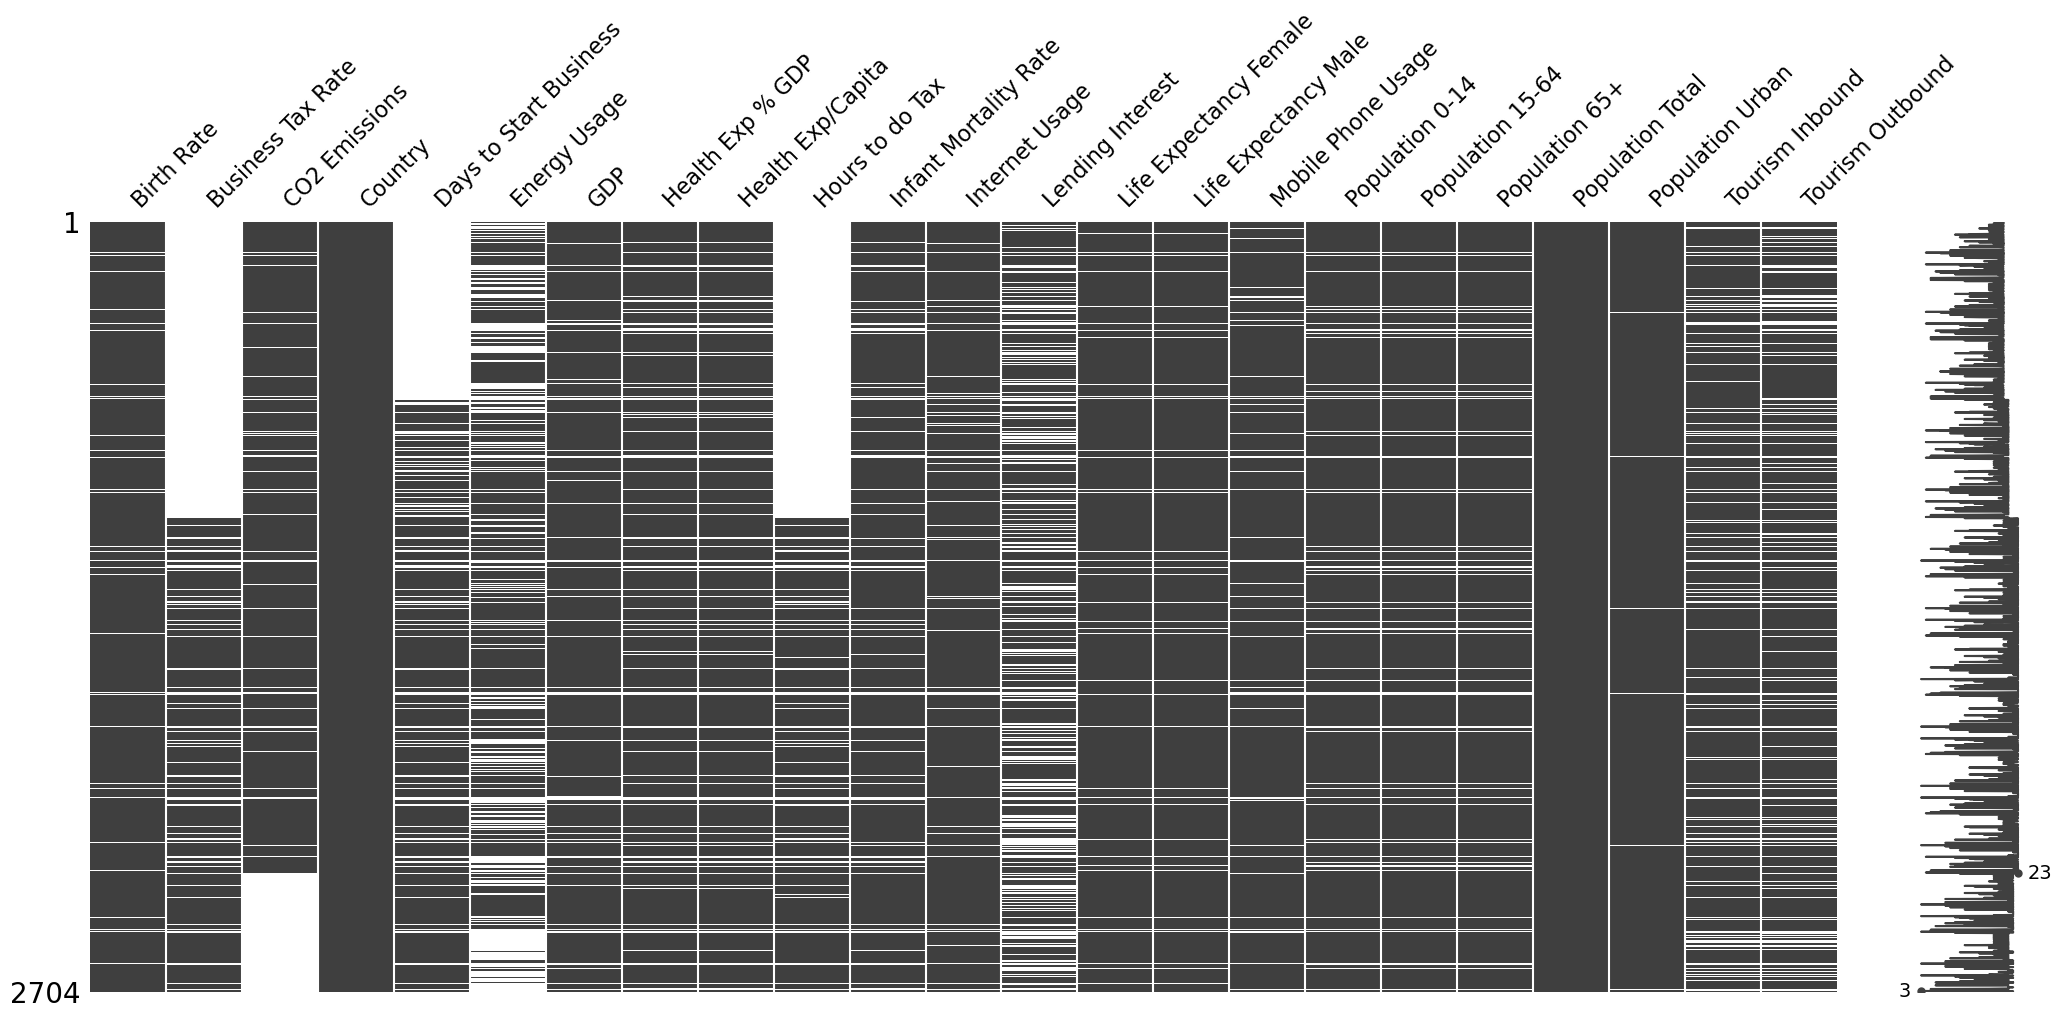

In [17]:
import missingno as mn
mn.matrix(df)
plt.show()

In [18]:
print('There are so many NULL values in the dataset, and if we drop the records having NULL values, we might end up losing most of the valuable data.')
print('So We will Impute this NULL values using Some Imputing Techniques.')
print('KNNImputer is one of the best way to deal with NULL values, so we will use KNNImputer.')
print('Before using KNNImputer, we should Normalize the data.')

There are so many NULL values in the dataset, and if we drop the records having NULL values, we might end up losing most of the valuable data.
So We will Impute this NULL values using Some Imputing Techniques.
KNNImputer is one of the best way to deal with NULL values, so we will use KNNImputer.
Before using KNNImputer, we should Normalize the data.


In [19]:
df1 = df.copy()
df1 = df1.drop('Country',axis=1)
df1=pd.DataFrame(MinMaxScaler().fit_transform(df1),columns=df1.columns)
df1

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.282609                NaN       0.010610                     NaN   
1       0.934783                NaN       0.001151                     NaN   
2       0.782609                NaN       0.000194                     NaN   
3       0.434783                NaN       0.000515                     NaN   
4       0.847826                NaN       0.000125                     NaN   
...          ...                ...            ...                     ...   
2699         NaN                NaN            NaN                     NaN   
2700    0.130435           0.115443            NaN                0.005772   
2701    0.173913           0.101843            NaN                0.008658   
2702    0.282609           0.162285            NaN                0.206349   
2703    0.086957                NaN            NaN                     NaN   

      Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0         0.009895  0.003369          0.124424           0.005855   
1         0.002746  0.000558          0.119816           0.002019   
2         0.000724  0.000141          0.161290           0.001312   
3         0.000670  0.000352          0.179724           0.015142   
4              NaN  0.000157          0.198157           0.001009   
...            ...       ...               ...                ...   
2699           NaN       NaN               NaN                NaN   
2700      0.781766  1.000000          0.788018           0.897739   
2701           NaN  0.003074          0.373272           0.131839   
2702           NaN  0.023468          0.175115           0.059661   
2703           NaN       NaN               NaN                NaN   

      Hours to do Tax  Infant Mortality Rate  Internet Usage  \
0                 NaN               0.230216             0.0   
1                 NaN               0.906475             0.0   
2                 NaN               0.633094             0.0   
3                 NaN               0.374101             0.0   
4                 NaN               0.676259             0.0   
...               ...                    ...             ...   
2699              NaN                    NaN             NaN   
2700         0.062983               0.028777             0.8   
2701         0.115147               0.057554             0.5   
2702         0.301391               0.079137             0.5   
2703              NaN                    NaN             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0             0.019153                0.666667              0.588235   
1             0.207056                0.166667              0.137255   
2                  NaN                0.375000              0.313725   
3             0.030242                0.270833              0.235294   
4                  NaN                0.270833              0.235294   
...                ...                     ...                   ...   
2699               NaN                     NaN                   NaN   
2700          0.005645                0.875000              0.764706   
2701          0.021573                0.854167              0.725490   
2702          0.032056                0.812500              0.686275   
2703               NaN                0.916667              0.764706   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.586387          0.377604        0.149378   
1               0.000000         0.937173          0.065104        0.091286   
2               0.000000         0.879581          0.111979        0.107884   
3               0.034483         0.693717          0.294271        0.107884   
4               0.000000         0.916230          0.080729        0.103734   
...                  ...              ...               ...             ...   
2699                 NaN              NaN            

In [20]:
null_imputer = KNNImputer()
imputed_df = pd.DataFrame(null_imputer.fit_transform(df1),columns=df1.columns)
imputed_df

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.282609           0.074403       0.010610                0.062915   
1       0.934783           0.416017       0.001151                0.183838   
2       0.782609           0.179027       0.000194                0.050216   
3       0.434783           0.043518       0.000515                0.146609   
4       0.847826           0.180659       0.000125                0.070130   
...          ...                ...            ...                     ...   
2699    0.213043           0.044545       0.004650                0.067821   
2700    0.130435           0.115443       0.674995                0.005772   
2701    0.173913           0.101843       0.000362                0.008658   
2702    0.282609           0.162285       0.000017                0.206349   
2703    0.086957           0.137927       0.000054                0.035786   

      Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0         0.009895  0.003369          0.124424           0.005855   
1         0.002746  0.000558          0.119816           0.002019   
2         0.000724  0.000141          0.161290           0.001312   
3         0.000670  0.000352          0.179724           0.015142   
4         0.007332  0.000157          0.198157           0.001009   
...            ...       ...               ...                ...   
2699      0.000682  0.000148          0.282028           0.168807   
2700      0.781766  1.000000          0.788018           0.897739   
2701      0.003697  0.003074          0.373272           0.131839   
2702      0.021048  0.023468          0.175115           0.059661   
2703      0.005419  0.001271          0.196313           0.238340   

      Hours to do Tax  Infant Mortality Rate  Internet Usage  \
0            0.062674               0.230216             0.0   
1            0.106028               0.906475             0.0   
2            0.112674               0.633094             0.0   
3            0.077512               0.374101             0.0   
4            0.242504               0.676259             0.0   
...               ...                    ...             ...   
2699         0.063679               0.017266             0.2   
2700         0.062983               0.028777             0.8   
2701         0.115147               0.057554             0.5   
2702         0.301391               0.079137             0.5   
2703         0.097836               0.012950             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0             0.019153                0.666667              0.588235   
1             0.207056                0.166667              0.137255   
2             0.037621                0.375000              0.313725   
3             0.030242                0.270833              0.235294   
4             0.057419                0.270833              0.235294   
...                ...                     ...                   ...   
2699          0.027742                0.895833              0.756863   
2700          0.005645                0.875000              0.764706   
2701          0.021573                0.854167              0.725490   
2702          0.032056                0.812500              0.686275   
2703          0.019597                0.916667              0.764706   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.586387          0.377604        0.149378   
1               0.000000         0.937173          0.065104        0.091286   
2               0.000000         0.879581          0.111979        0.107884   
3               0.034483         0.693717          0.294271        0.107884   
4               0.000000         0.916230          0.080729        0.103734   
...                  ...              ...               ...             ...   
2699            0.275862         0.332461          0.

In [21]:
concated_df = pd.concat([raw['Country'],imputed_df],axis=1)
concated_df

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                      Algeria    0.282609           0.074403       0.010610   
1                       Angola    0.934783           0.416017       0.001151   
2                        Benin    0.782609           0.179027       0.000194   
3                     Botswana    0.434783           0.043518       0.000515   
4                 Burkina Faso    0.847826           0.180659       0.000125   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.213043           0.044545       0.004650   
2700             United States    0.130435           0.115443       0.674995   
2701                   Uruguay    0.173913           0.101843       0.000362   
2702             Venezuela, RB    0.282609           0.162285       0.000017   
2703     Virgin Islands (U.S.)    0.086957           0.137927       0.000054   

      Days to Start Business  Energy Usage       GDP  Health Exp % GDP  \
0                   0.062915      0.009895  0.003369          0.124424   
1                   0.183838      0.002746  0.000558          0.119816   
2                   0.050216      0.000724  0.000141          0.161290   
3                   0.146609      0.000670  0.000352          0.179724   
4                   0.070130      0.007332  0.000157          0.198157   
...                      ...           ...       ...               ...   
2699                0.067821      0.000682  0.000148          0.282028   
2700                0.005772      0.781766  1.000000          0.788018   
2701                0.008658      0.003697  0.003074          0.373272   
2702                0.206349      0.021048  0.023468          0.175115   
2703                0.035786      0.005419  0.001271          0.196313   

      Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
0              0.005855         0.062674               0.230216   
1              0.002019         0.106028               0.906475   
2              0.001312         0.112674               0.633094   
3              0.015142         0.077512               0.374101   
4              0.001009         0.242504               0.676259   
...                 ...              ...                    ...   
2699           0.168807         0.063679               0.017266   
2700           0.897739         0.062983               0.028777   
2701           0.131839         0.115147               0.057554   
2702           0.059661         0.301391               0.079137   
2703           0.238340         0.097836               0.012950   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0                0.0          0.019153                0.666667   
1                0.0          0.207056                0.166667   
2                0.0          0.037621                0.375000   
3                0.0          0.030242                0.270833   
4                0.0          0.057419                0.270833   
...              ...               ...                     ...   
2699             0.2          0.027742                0.895833   
2700             0.8          0.005645                0.875000   
2701             0.5          0.021573                0.854167   
2702             0.5          0.032056                0.812500   
2703             0.4          0.019597                0.916667   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                 0.588235            0.000000         0.586387   
1                 0.137255            0.000000         0.937173   
2                 0.313725            0.000000         0.879581   
3                 0.235294            0.034483         0.693717   
4                 0.235294            0.000000         0.916230   
...                    ...                 ...              ...   
2699              0.756863            0.275862         0.332461   
2700              0.764706            0

In [22]:
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2704 non-null   object 
 1   Birth Rate              2704 non-null   float64
 2   Business Tax Rate       2704 non-null   float64
 3   CO2 Emissions           2704 non-null   float64
 4   Days to Start Business  2704 non-null   float64
 5   Energy Usage            2704 non-null   float64
 6   GDP                     2704 non-null   float64
 7   Health Exp % GDP        2704 non-null   float64
 8   Health Exp/Capita       2704 non-null   float64
 9   Hours to do Tax         2704 non-null   float64
 10  Infant Mortality Rate   2704 non-null   float64
 11  Internet Usage          2704 non-null   float64
 12  Lending Interest        2704 non-null   float64
 13  Life Expectancy Female  2704 non-null   float64
 14  Life Expectancy Male    2704 non-null   

In [23]:
print('We can see that there are no NULL values present.')

We can see that there are no NULL values present.


In [24]:
print('Now we use GroupBy method to group all datapoints with respect to Each Country and calculate the mean value of all grouped points for each Country in each dimension.')
print("Since the data is spanned over 13 years, we simply can't use mean as aggregate function.")
print("Instead we will calculate Weighted mean, giving highest weightage to the most recent year.")

Now we use GroupBy method to group all datapoints with respect to Each Country and calculate the mean value of all grouped points for each Country in each dimension.
Since the data is spanned over 13 years, we simply can't use mean as aggregate function.
Instead we will calculate Weighted mean, giving highest weightage to the most recent year.


In [25]:
weights = [0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.66,0.73,0.77,0.83,0.87,0.9]
weighted_mean = lambda x: np.average(x,weights=weights)
final_df = concated_df.groupby('Country')[[i for i in concated_df.columns if i!='Country']].agg(weighted_mean).reset_index()
final_df.head(50)

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                Afghanistan    0.732860           0.087270       0.000487   
1                    Albania    0.145871           0.096882       0.000571   
2                    Algeria    0.353293           0.176565       0.013335   
3             American Samoa    0.223990           0.041901       0.000515   
4                    Andorra    0.090352           0.116982       0.000051   
5                     Angola    0.879181           0.178775       0.002823   
6        Antigua and Barbuda    0.234725           0.104864       0.000051   
7                  Argentina    0.224145           0.274785       0.016309   
8                    Armenia    0.150566           0.086401       0.000443   
9                      Aruba    0.097119           0.085790       0.000257   
10                 Australia    0.144777           0.122233       0.033050   
11                   Austria    0.047659           0.131662       0.008004   
12                Azerbaijan    0.226814           0.093710       0.004422   
13              Bahamas, The    0.185265           0.100837       0.000149   
14                   Bahrain    0.225945           0.023423       0.001907   
15                Bangladesh    0.326827           0.084174       0.005089   
16                  Barbados    0.130435           0.095198       0.000172   
17                   Belarus    0.081393           0.262379       0.006845   
18                   Belgium    0.100978           0.148634       0.012172   
19                    Belize    0.399859           0.078941       0.000446   
20                     Benin    0.691021           0.189997       0.000494   
21                   Bermuda    0.119919           0.067882       0.000122   
22                    Bhutan    0.321038           0.096752       0.000085   
23                   Bolivia    0.443337           0.211370       0.001567   
24    Bosnia and Herzegovina    0.036114           0.076322       0.002848   
25                  Botswana    0.387445           0.032420       0.003343   
26                    Brazil    0.208805           0.176781       0.042409   
27         Brunei Darussalam    0.238359           0.059397       0.002324   
28                  Bulgaria    0.062870           0.103253       0.005297   
29              Burkina Faso    0.791356           0.118439       0.000236   
30                   Burundi    0.813031           0.515951       0.000068   
31                  Cambodia    0.414973           0.050206       0.000573   
32                  Cameroon    0.702052           0.133088       0.000648   
33                    Canada    0.086957           0.089110       0.059293   
34            Cayman Islands    0.184281           0.048446       0.000496   
35  Central African Republic    0.628280           0.439929       0.000187   
36                      Chad    0.895035           0.198206       0.000052   
37                     Chile    0.165970           0.054463       0.006112   
38                     China    0.110625           0.189390       0.811967   
39                  Colombia    0.289973           0.198423       0.010795   
40                   Comoros    0.668414           0.633726       0.000014   
41          Congo, Dem. Rep.    0.821681           0.865687       0.000621   
42               Congo, Rep.    0.689960           0.169518       0.000188   
43                Costa Rica    0.207422           0.140084       0.001485   
44             Cote d'Ivoire    0.645228           0.147510       0.000794   
45                   Croatia    0.058271           0.049265       0.002677   
46                      Cuba    0.078274           0.096095       0.003304   
47                   Curacao    0.153846           0.080415       0.000027   
48                    Cyprus    0.110304           0.048981       0.002910   
49            Czech Republic    0.074608           0.135859       0.013067   

    Days to Start Business  Energy Usage  

In [26]:
final_df.shape

(208, 23)

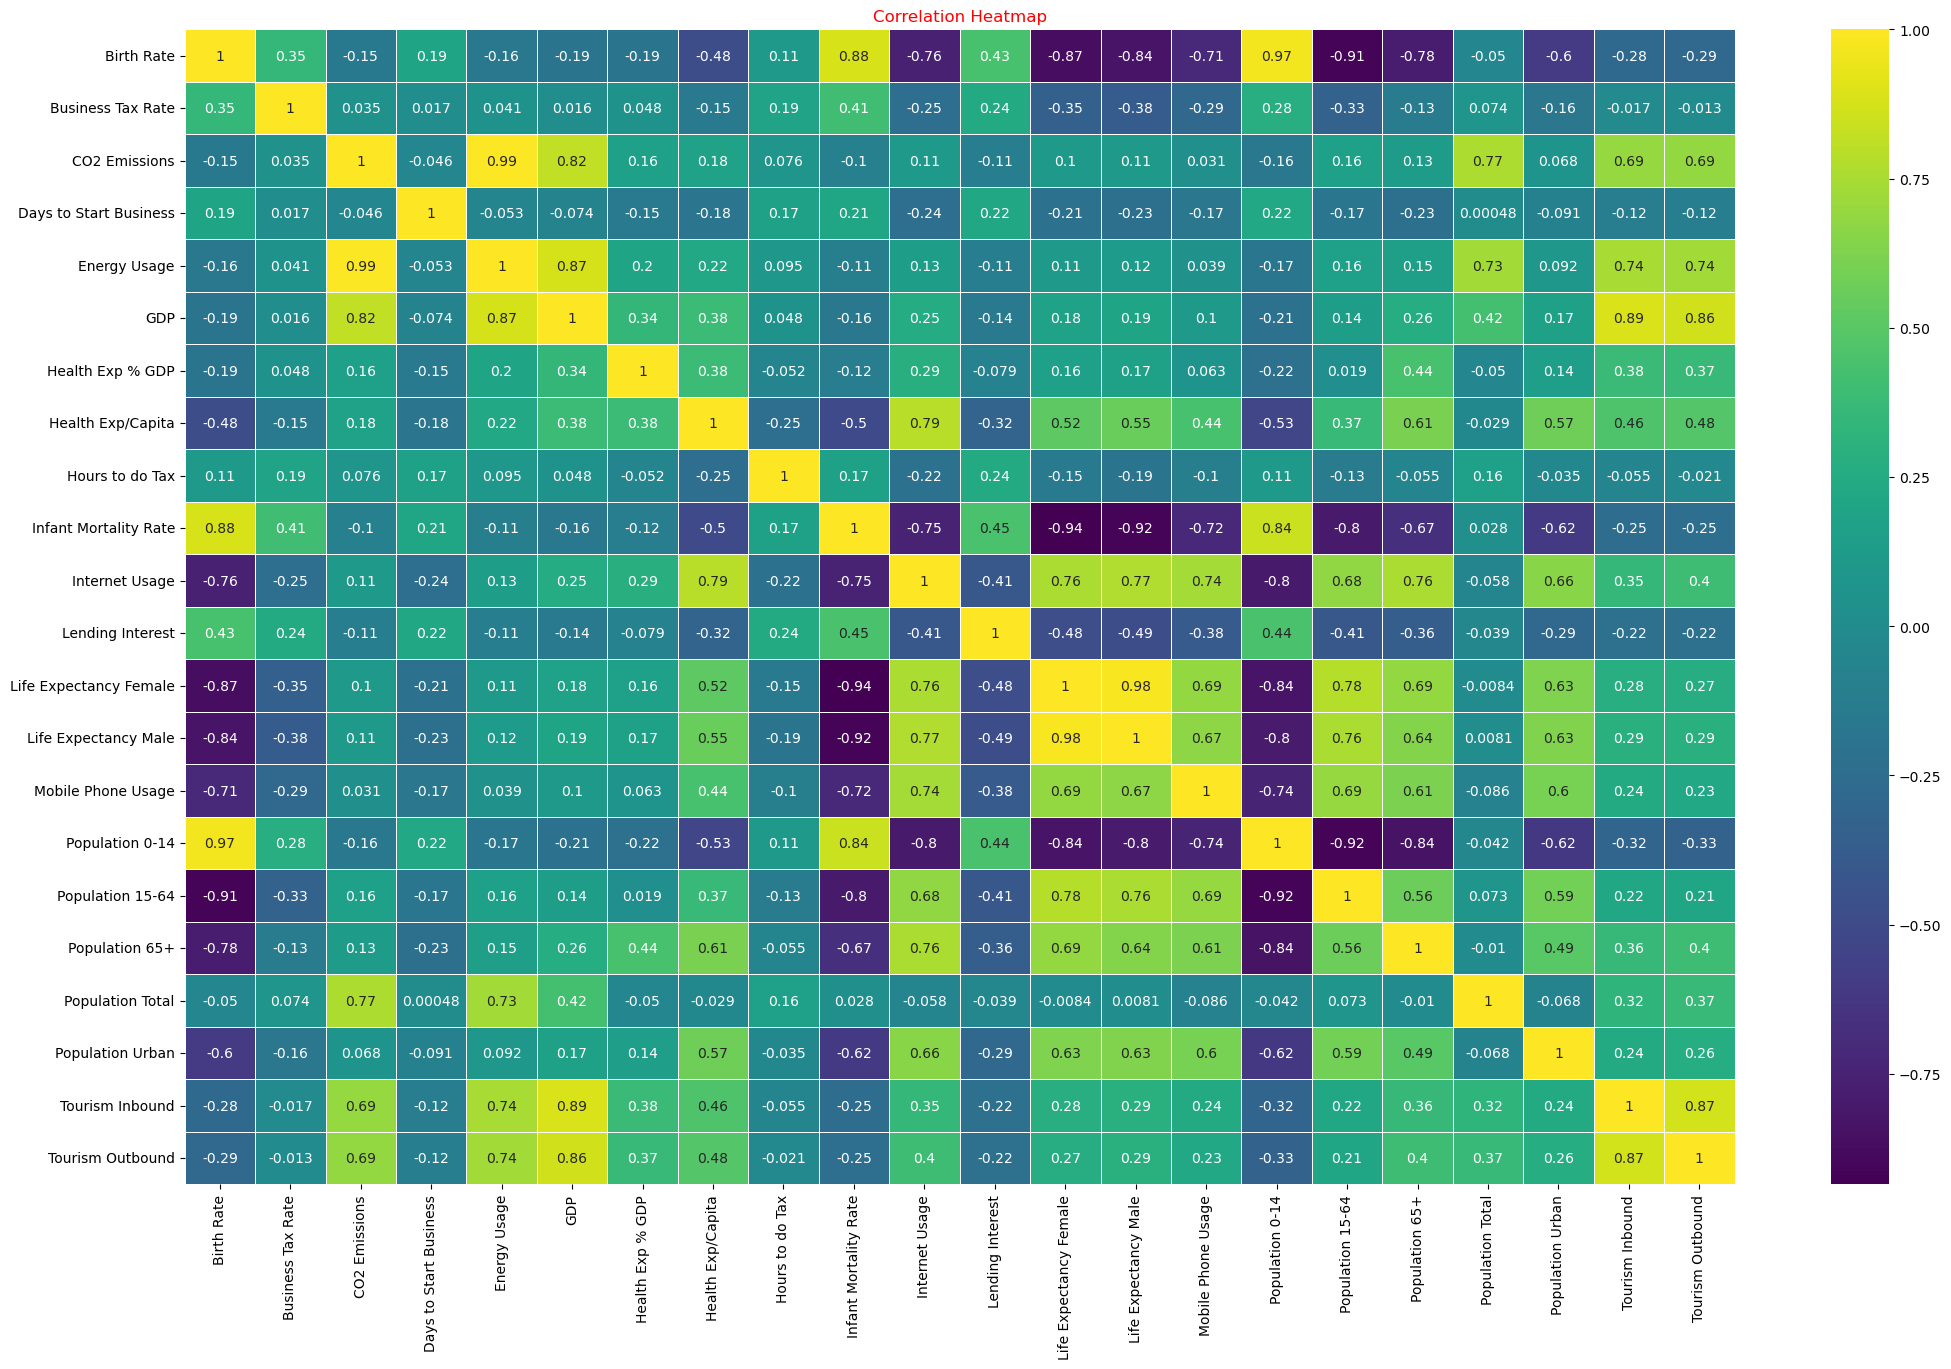

In [27]:
fig=plt.figure(figsize=(25,15))
sns.heatmap(final_df.corr(),linewidths=0.5,annot=True,cmap='viridis')
plt.title('Correlation Heatmap',fontdict={'color':'red'})
fig.savefig('Corr.jpg',dpi=500)
plt.show()

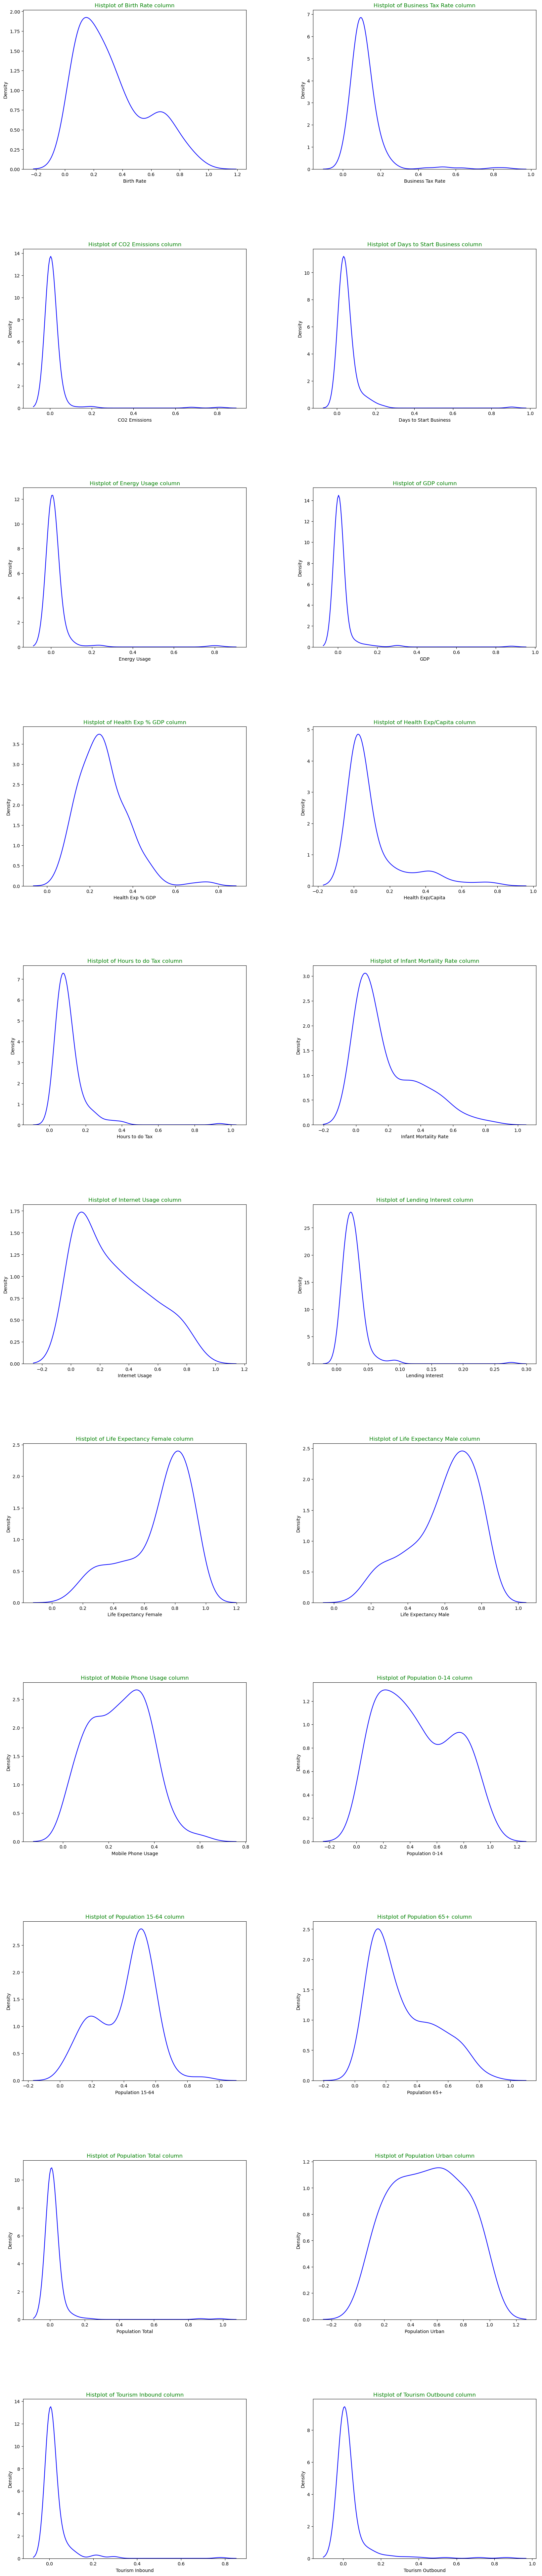

In [28]:
ddf = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(20,100))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in ddf.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2
        sns.distplot(ddf[i],kde=True,hist=False,color='b',ax=axs[x,y])
        axs[x,y].set_title('Histplot of {} column'.format(i),fontdict={'color':'green'})
        counter+=1
#fig.savefig('dist.jpg',dpi=500)
plt.show()


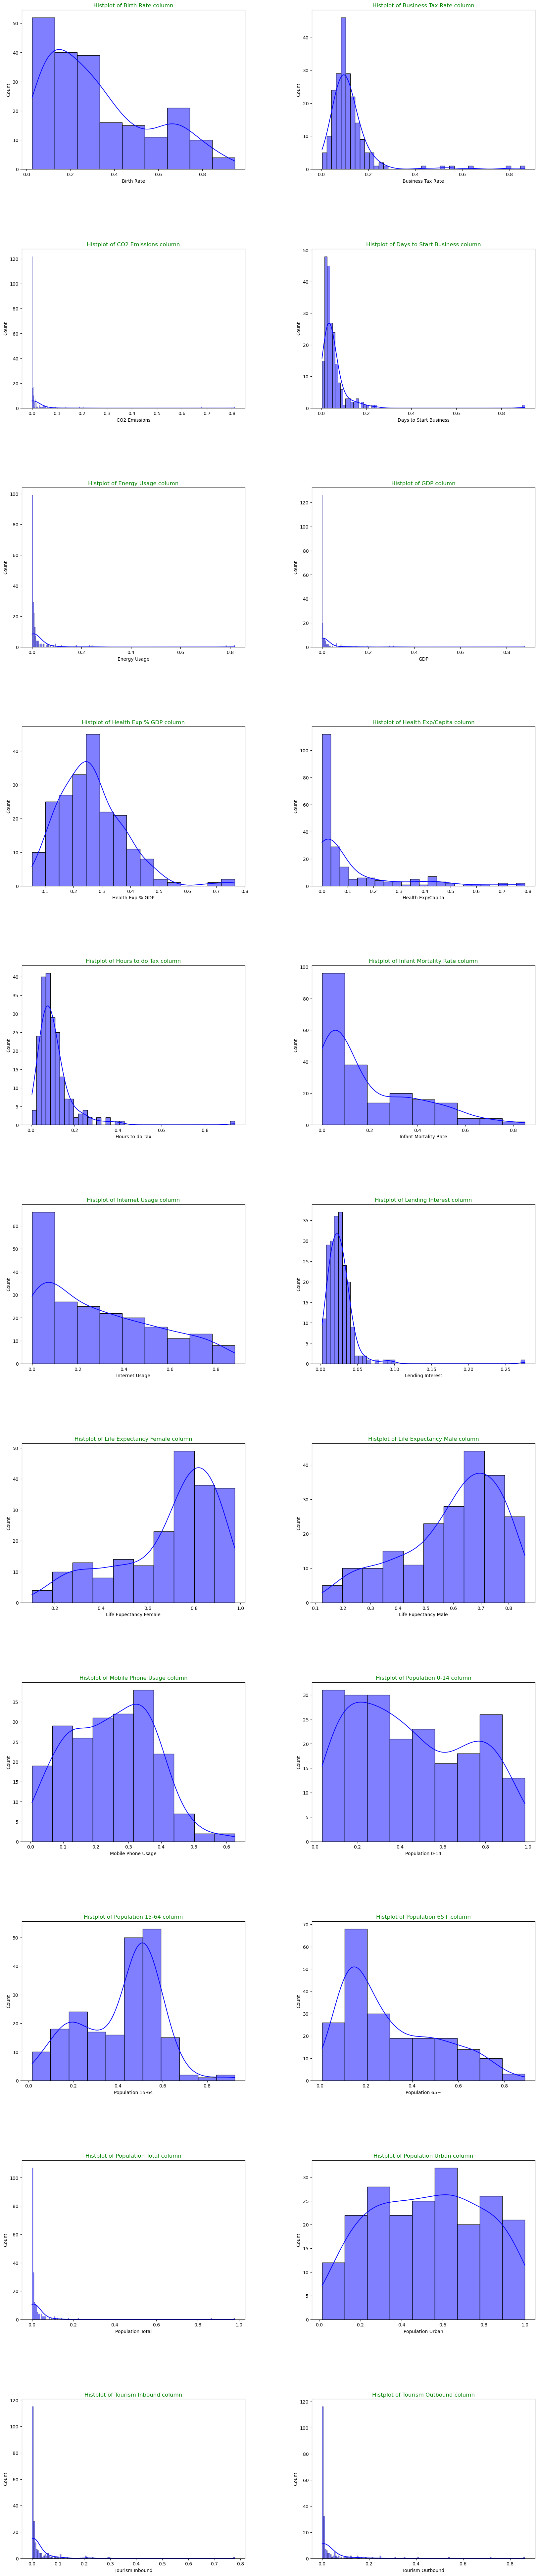

In [29]:
gdf = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(20,100))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in gdf.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2
        sns.histplot(gdf[i],kde=True,color='b',ax=axs[x,y])
        axs[x,y].set_title('Histplot of {} column'.format(i),fontdict={'color':'green'})
        counter+=1
#fig.savefig('hist.jpg',dpi=500)
plt.show()


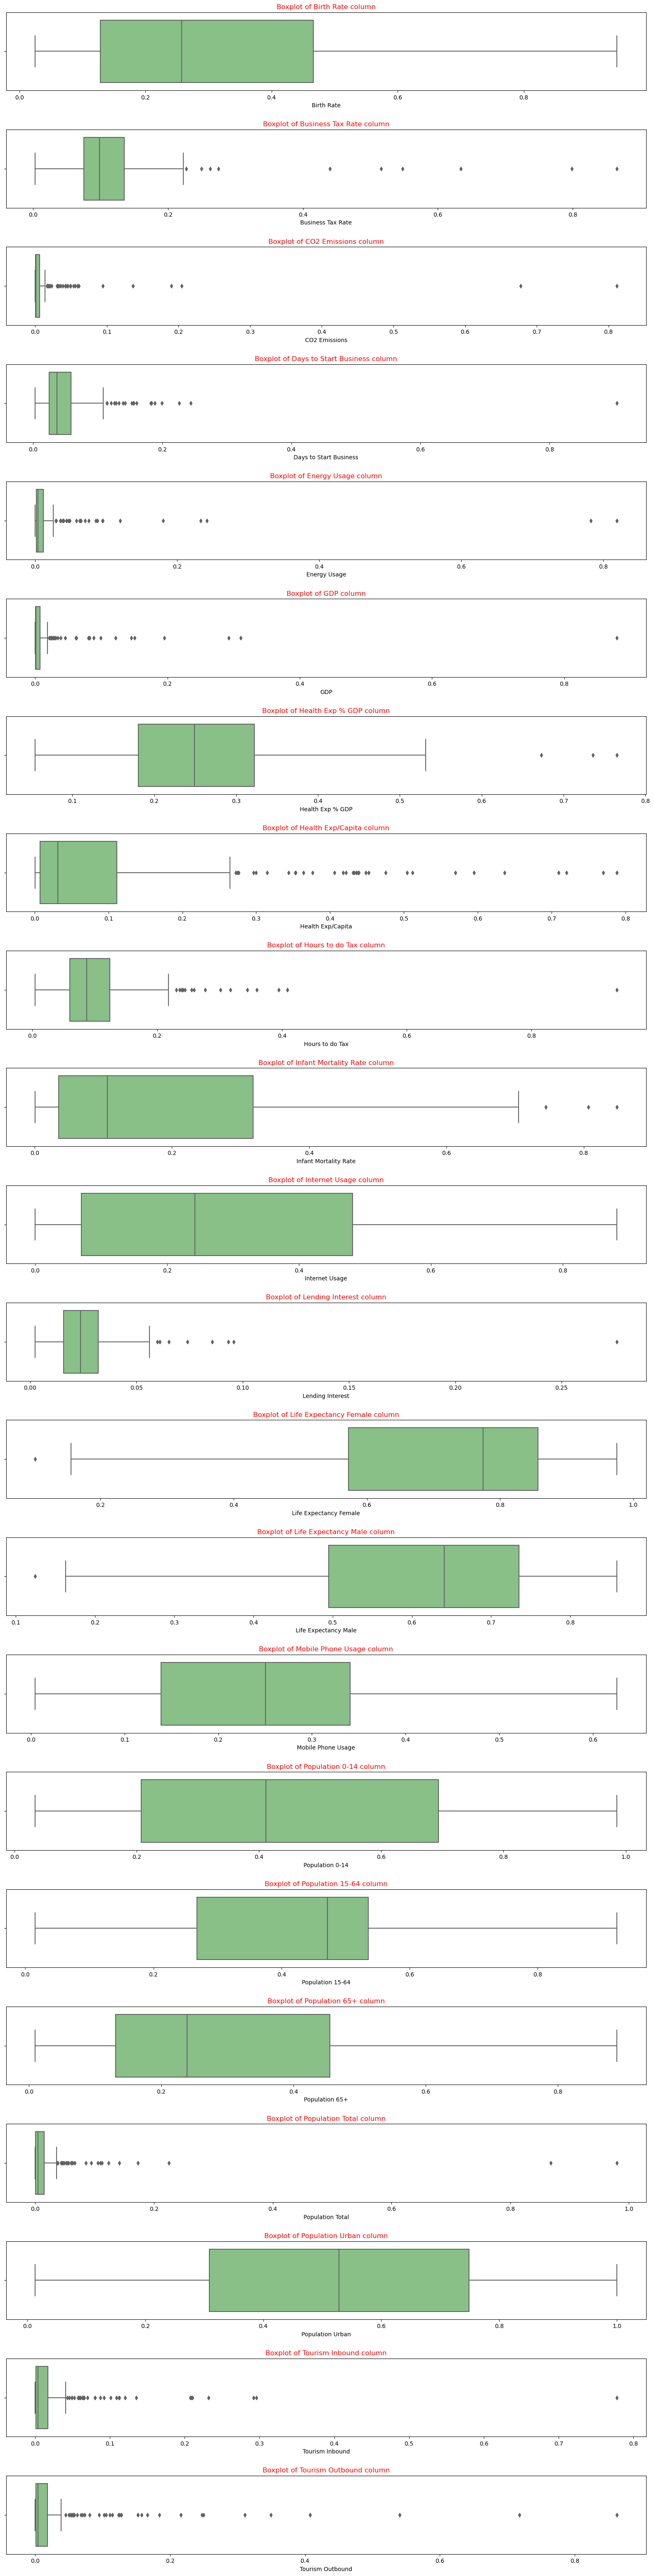

In [30]:
fig, axs = plt.subplots(22,1,sharex=False,sharey=False,figsize=(20,80))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in final_df.columns:
    if i != 'Country':
        sns.boxplot(x=i,data = final_df,palette = 'Accent',ax = axs[counter])
        axs[counter].set_title('Boxplot of {} column'.format(i),fontdict={'color':'red'})
        counter+=1
#fig.savefig('box.jpg',dpi=700)
plt.show()


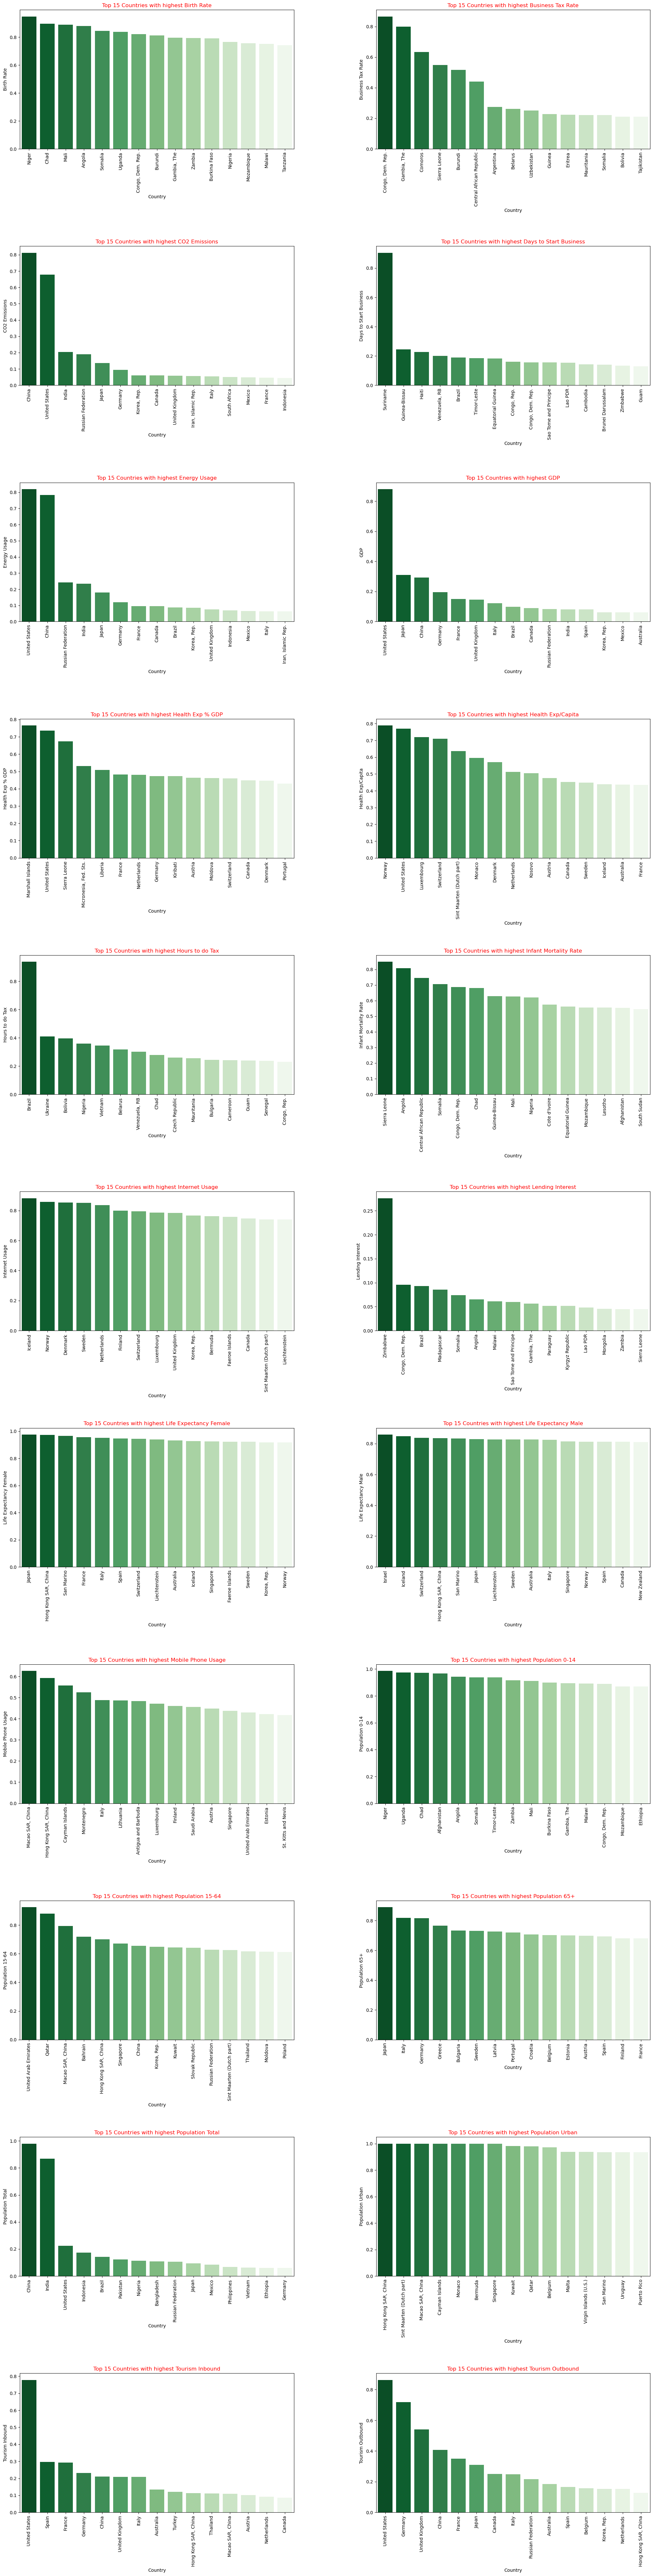

In [31]:
df4 = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(25,100))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0
for i in df4.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2       
        df5 = df4.sort_values(by =i,ascending=False)
        df6 = df5.head(15)
        sns.barplot(x=df6['Country'],y=df6[i],palette='Greens_r',data=df6,ax=axs[x,y])
        axs[x,y].set_title('Top 15 Countries with highest {}'.format(i),fontdict={'color':'red'})
        for tick in axs[x,y].get_xticklabels():
                        tick.set_rotation(90)
        counter+=1
#fig.savefig('Top15.jpg',dpi=500)
plt.show()


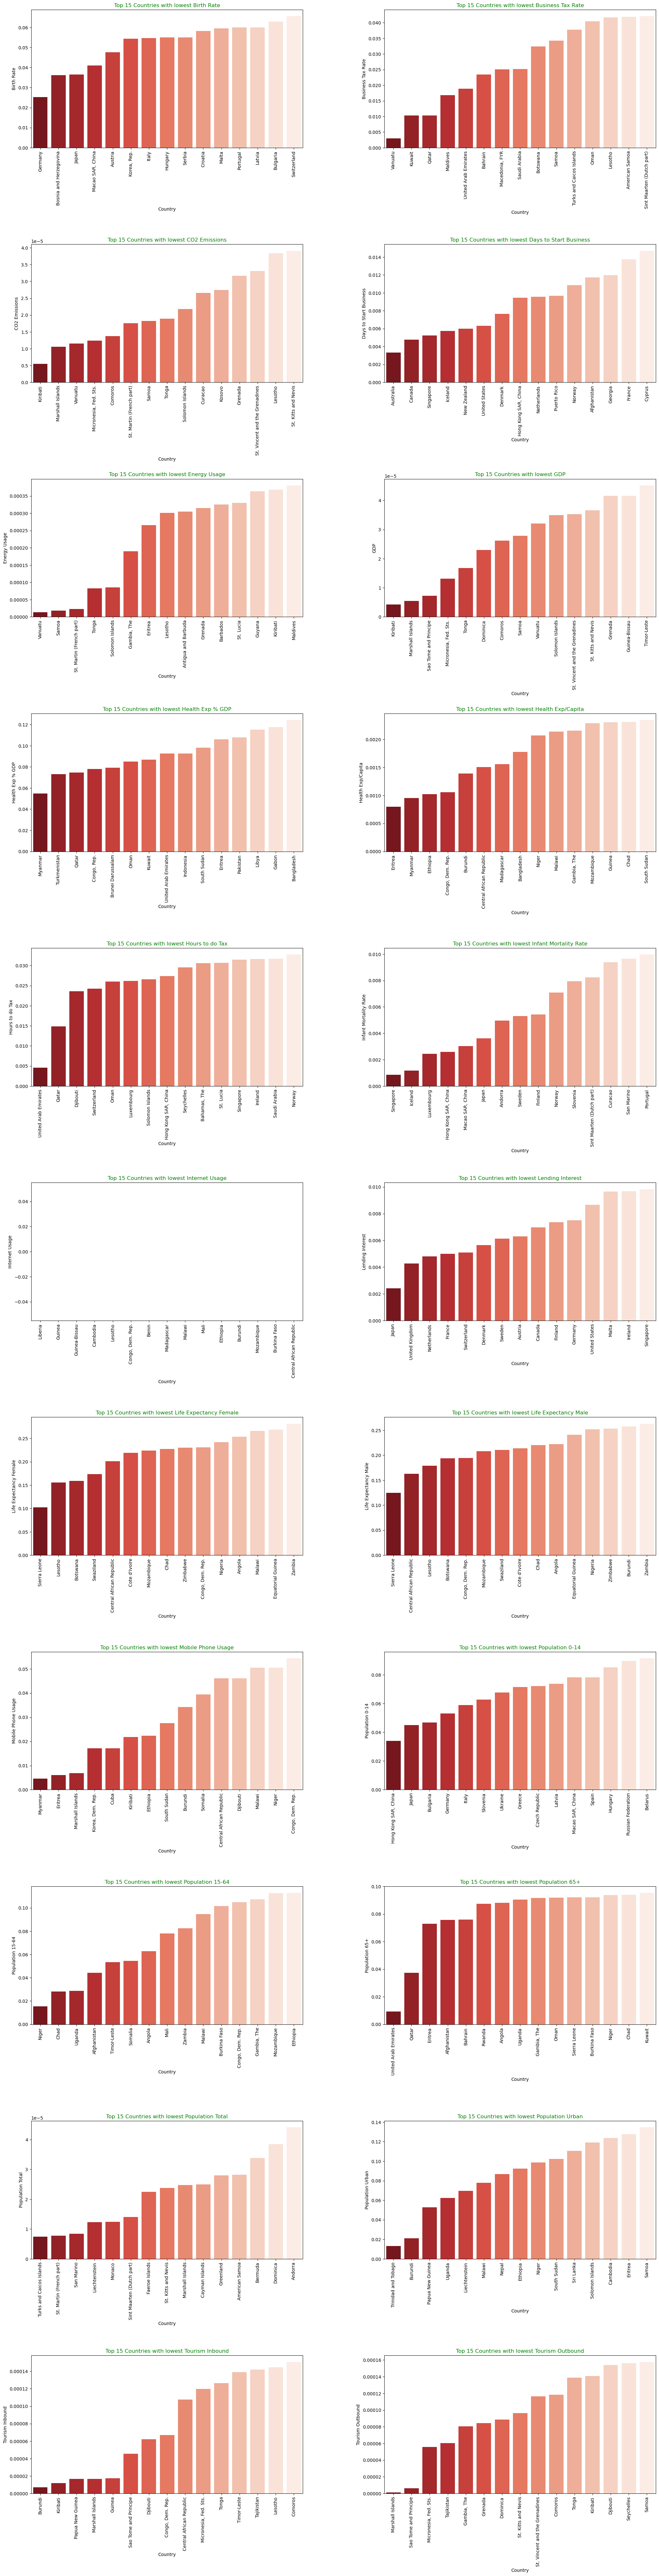

In [32]:
df4 = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(25,100))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0
for i in df4.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2       
        df5 = df4.sort_values(by =i)
        df6 = df5.head(15)
        sns.barplot(x=df6['Country'],y=df6[i],palette='Reds_r',data=df6,ax=axs[x,y])
        axs[x,y].set_title('Top 15 Countries with lowest {}'.format(i),fontdict={'color':'green'})
        for tick in axs[x,y].get_xticklabels():
                        tick.set_rotation(90)
        counter+=1
#fig.savefig('Least15.jpg',dpi=500)
plt.show()


In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [34]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(final_df.iloc[:,1:]),columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20','PCA21','PCA22'])

In [35]:
pca_df.head(10)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  1.005212  0.141537  0.100866 -0.115094 -0.131577 -0.079093 -0.052618   
1 -0.217874 -0.250431  0.031709 -0.012559 -0.014370 -0.076223  0.020050   
2  0.067427 -0.116256 -0.196313  0.171695  0.055805 -0.008603  0.024531   
3 -0.513874  0.176063 -0.167303 -0.049556 -0.072729  0.018557 -0.068837   
4 -0.643922  0.148853 -0.129608 -0.081245 -0.034744 -0.005212  0.025852   
5  1.166577  0.335445 -0.012369 -0.071422  0.114115  0.157205  0.057184   
6 -0.122425 -0.308237  0.120358 -0.134596 -0.171288  0.122386  0.125808   
7 -0.356614  0.125032 -0.168347  0.085523  0.132425 -0.180731  0.108728   
8 -0.243262 -0.231114 -0.058441  0.077071  0.153268 -0.091957  0.002019   
9 -0.356369 -0.262694  0.105731 -0.100873 -0.005911  0.129504  0.036827   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.057070 -0.055618  0.041083  0.101061 -0.012126 -0.019538  0.085894   
1  0.015336  0.007934  0.014422 -0.007191 -0.029725 -0.035816  0.017567   
2  0.064943 -0.006311 -0.025801 -0.045717 -0.055133  0.041542  0.028716   
3  0.050104  0.094733  0.048501  0.013774  0.012061 -0.028423 -0.039910   
4  0.060854  0.069250  0.017037  0.051873 -0.002980 -0.040667 -0.079377   
5 -0.071687  0.031620 -0.048114  0.017505  0.033706 -0.135740  0.141966   
6 -0.070092 -0.124294 -0.000217 -0.024834  0.029202  0.101177  0.033551   
7  0.025289 -0.112115 -0.007834  0.030562  0.045179  0.034214 -0.011433   
8 -0.017483  0.080599 -0.041858 -0.028668 -0.085150 -0.023361  0.020029   
9 -0.015983 -0.070421  0.026072  0.011014  0.008809  0.000530  0.003795   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0  0.022136 -0.038076 -0.014758  0.018435 -0.006186 -0.004492  0.001046   
1  0.030546 -0.036403 -0.005991 -0.005366  0.002855 -0.003569 -0.001413   
2 -0.038763  0.039736 -0.002317 -0.034164 -0.008087  0.012528 -0.001891   
3 -0.035997  0.016513  0.005611  0.021450  0.005399 -0.006630 -0.002478   
4  0.047918 -0.070248 -0.001284  0.007353 -0.010323 -0.001124  0.010571   
5 -0.043503 -0.044895 -0.011353  0.029379  0.023532 -0.004475 -0.003174   
6  0.022226 -0.020465 -0.016276 -0.015341  0.004470  0.008519  0.000704   
7  0.031361 -0.017166 -0.009187  0.013568  0.001406  0.008578  0.000561   
8 -0.012400 -0.010251 -0.004462 -0.008688  0.013211 -0.000313 -0.001737   
9  0.033159 -0.044981 -0.003998 -0.017222  0.001523  0.003063  0.005901   

      PCA22  
0  0.000095  
1 -0.000075  
2 -0.000126  
3 -0.000047  
4  0.000050  
5 -0.000058  
6  0.000043  
7  0.000570  
8  0.000186  
9  0.000312

In [36]:
var = pca.explained_variance_ratio_
variance = np.cumsum(np.round(var,decimals = 4)*100)
variance

array([66.41, 73.89, 80.43, 85.  , 88.64, 91.12, 92.77, 94.16, 95.35,
       96.38, 97.26, 98.01, 98.62, 99.14, 99.42, 99.67, 99.79, 99.88,
       99.94, 99.99, 99.99, 99.99])

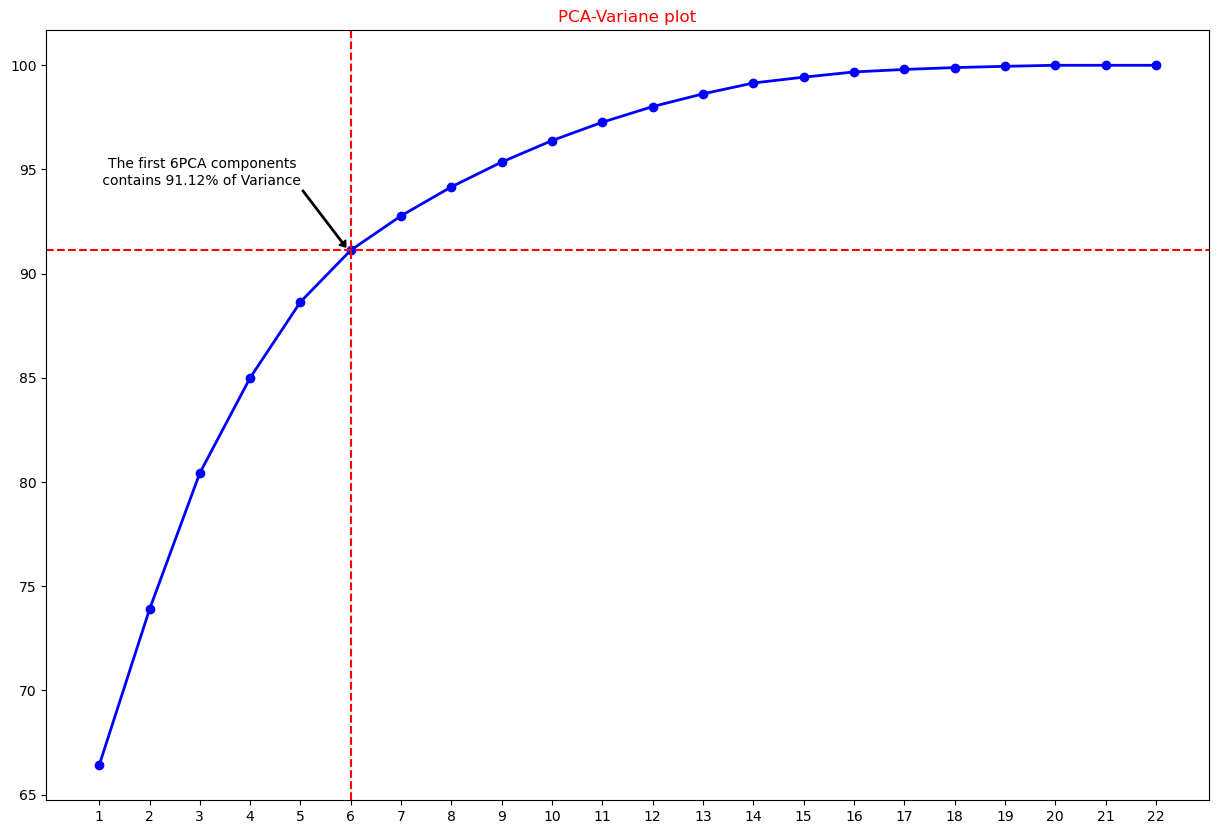

In [37]:
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(pca.n_components_) + 1,variance,marker='o', linewidth=2, color='blue')
plt.xticks(np.arange(pca.n_components_)+1)
plt.axvline(x=6,animated=True,color='red',linestyle='--')
plt.axhline(y=91.12,animated=True,color='red',linestyle='--')
x=6
y=91.12
plt.annotate("The first 6PCA components \n contains 91.12% of Variance",
             xy=(x-0.1, y+0.15), xytext=(x-1,y+3), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='right', verticalalignment='bottom')
fig.savefig('PCA.jpg',dpi=500)
plt.title('PCA-Variane plot',fontdict={'color':'red'})
plt.show()

In [38]:
data_tsne_2 = TSNE(n_components=2,random_state=21).fit_transform(final_df.iloc[:,1:])
#cluster.tsneplot(score=data_tsne_2,figtype='jpg')
#plot will be automatically saved in same directory in png format

In [39]:
data_tsne_2 = pd.DataFrame(data_tsne_2)

In [40]:
data_tsne_3 = TSNE(n_components=3,random_state=21).fit_transform(final_df.iloc[:,1:])

In [41]:
data_tsne_3 = pd.DataFrame(data_tsne_3)

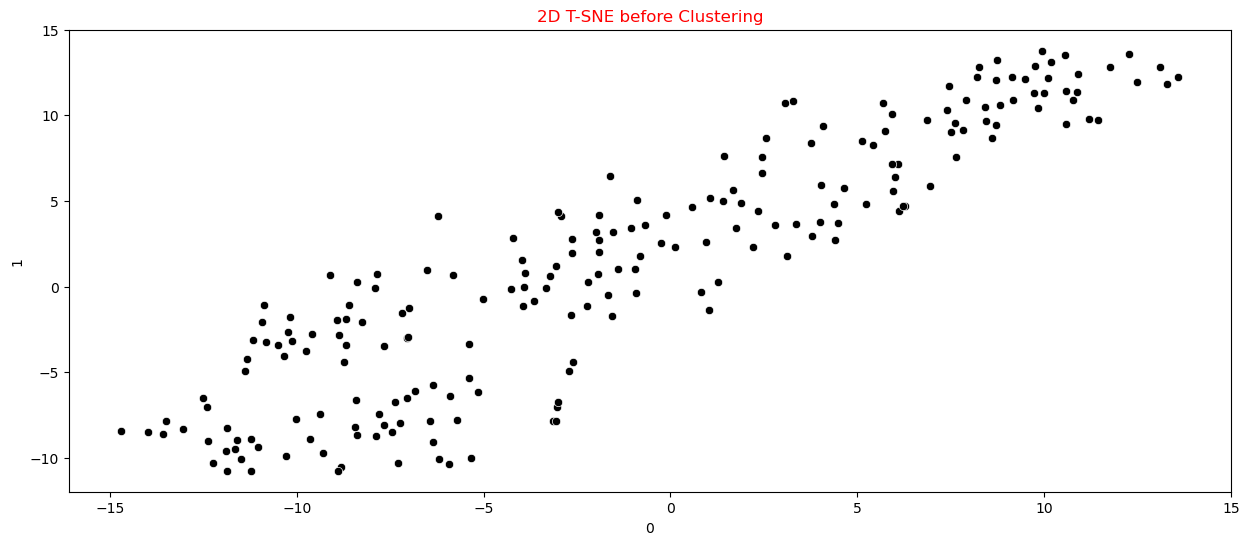

In [42]:
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0],y=data_tsne_2.iloc[:,1],color='black')
plt.title('2D T-SNE before Clustering',fontdict={'color':'red'})
fig.savefig('TSNE-2D.jpg')
plt.show()

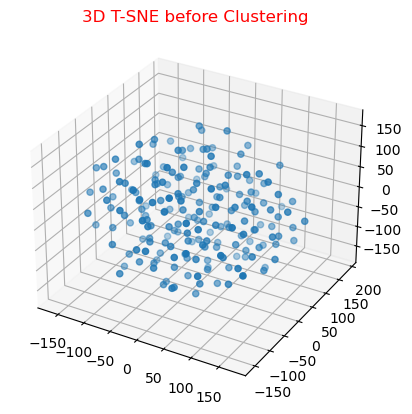

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne_3.iloc[:,0], data_tsne_3.iloc[:,1], data_tsne_3.iloc[:,2])
plt.title('3D T-SNE before Clustering',fontdict={'color':'red'})
plt.show()
fig.savefig('TSNE-3D.jpg',dpi=400)

In [44]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

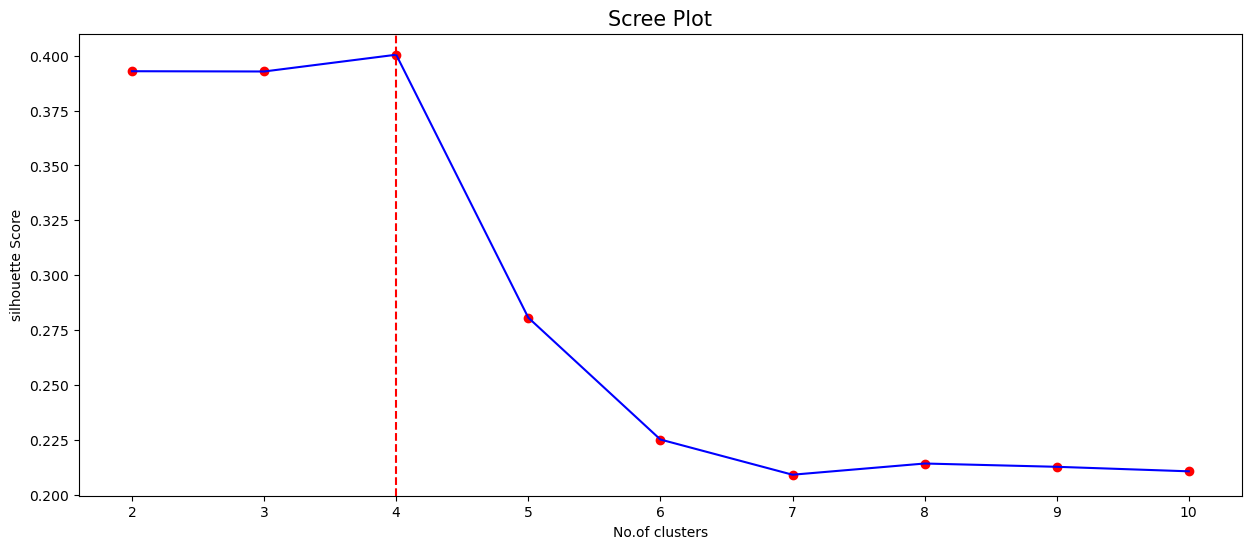

The maximum silhouette score obtained for n_clusters = 4
 and the Silhouette_score is : 0.40041943185526235


In [45]:
nc=range(2,11)
sc_score=[]    
for i in range(2,11):
    clusterer = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='complete')
    y = clusterer.fit_predict(final_df.iloc[:,1:])

    silhouette_avg = silhouette_score(final_df.iloc[:,1:], y)
    sc_score.append(silhouette_avg)


plt.figure(figsize=(15,6))
plt.title('Scree Plot',fontsize=15)
plt.xlabel('No.of clusters',fontsize= 10)
plt.ylabel('silhouette Score', fontsize= 10)
plt.plot(nc,sc_score,color="blue")
plt.axvline(x=nc[np.argmax(sc_score)],linestyle='--',c='red')
plt.scatter(nc,sc_score,color="red")
plt.show()
print("The maximum silhouette score obtained for n_clusters = {}\n and the Silhouette_score is : {}".format(nc[np.argmax(sc_score)],np.max(sc_score)))

In [46]:
h_clusterer = AgglomerativeClustering(n_clusters= 4 , affinity='euclidean', linkage='complete')
h_labels = h_clusterer.fit_predict(final_df.iloc[:,1:])

silhouette_avg = silhouette_score(final_df.iloc[:,1:], h_labels)
print('Silhoutte Scored is {}'.format(silhouette_avg))

Silhoutte Scored is 0.40041943185526235


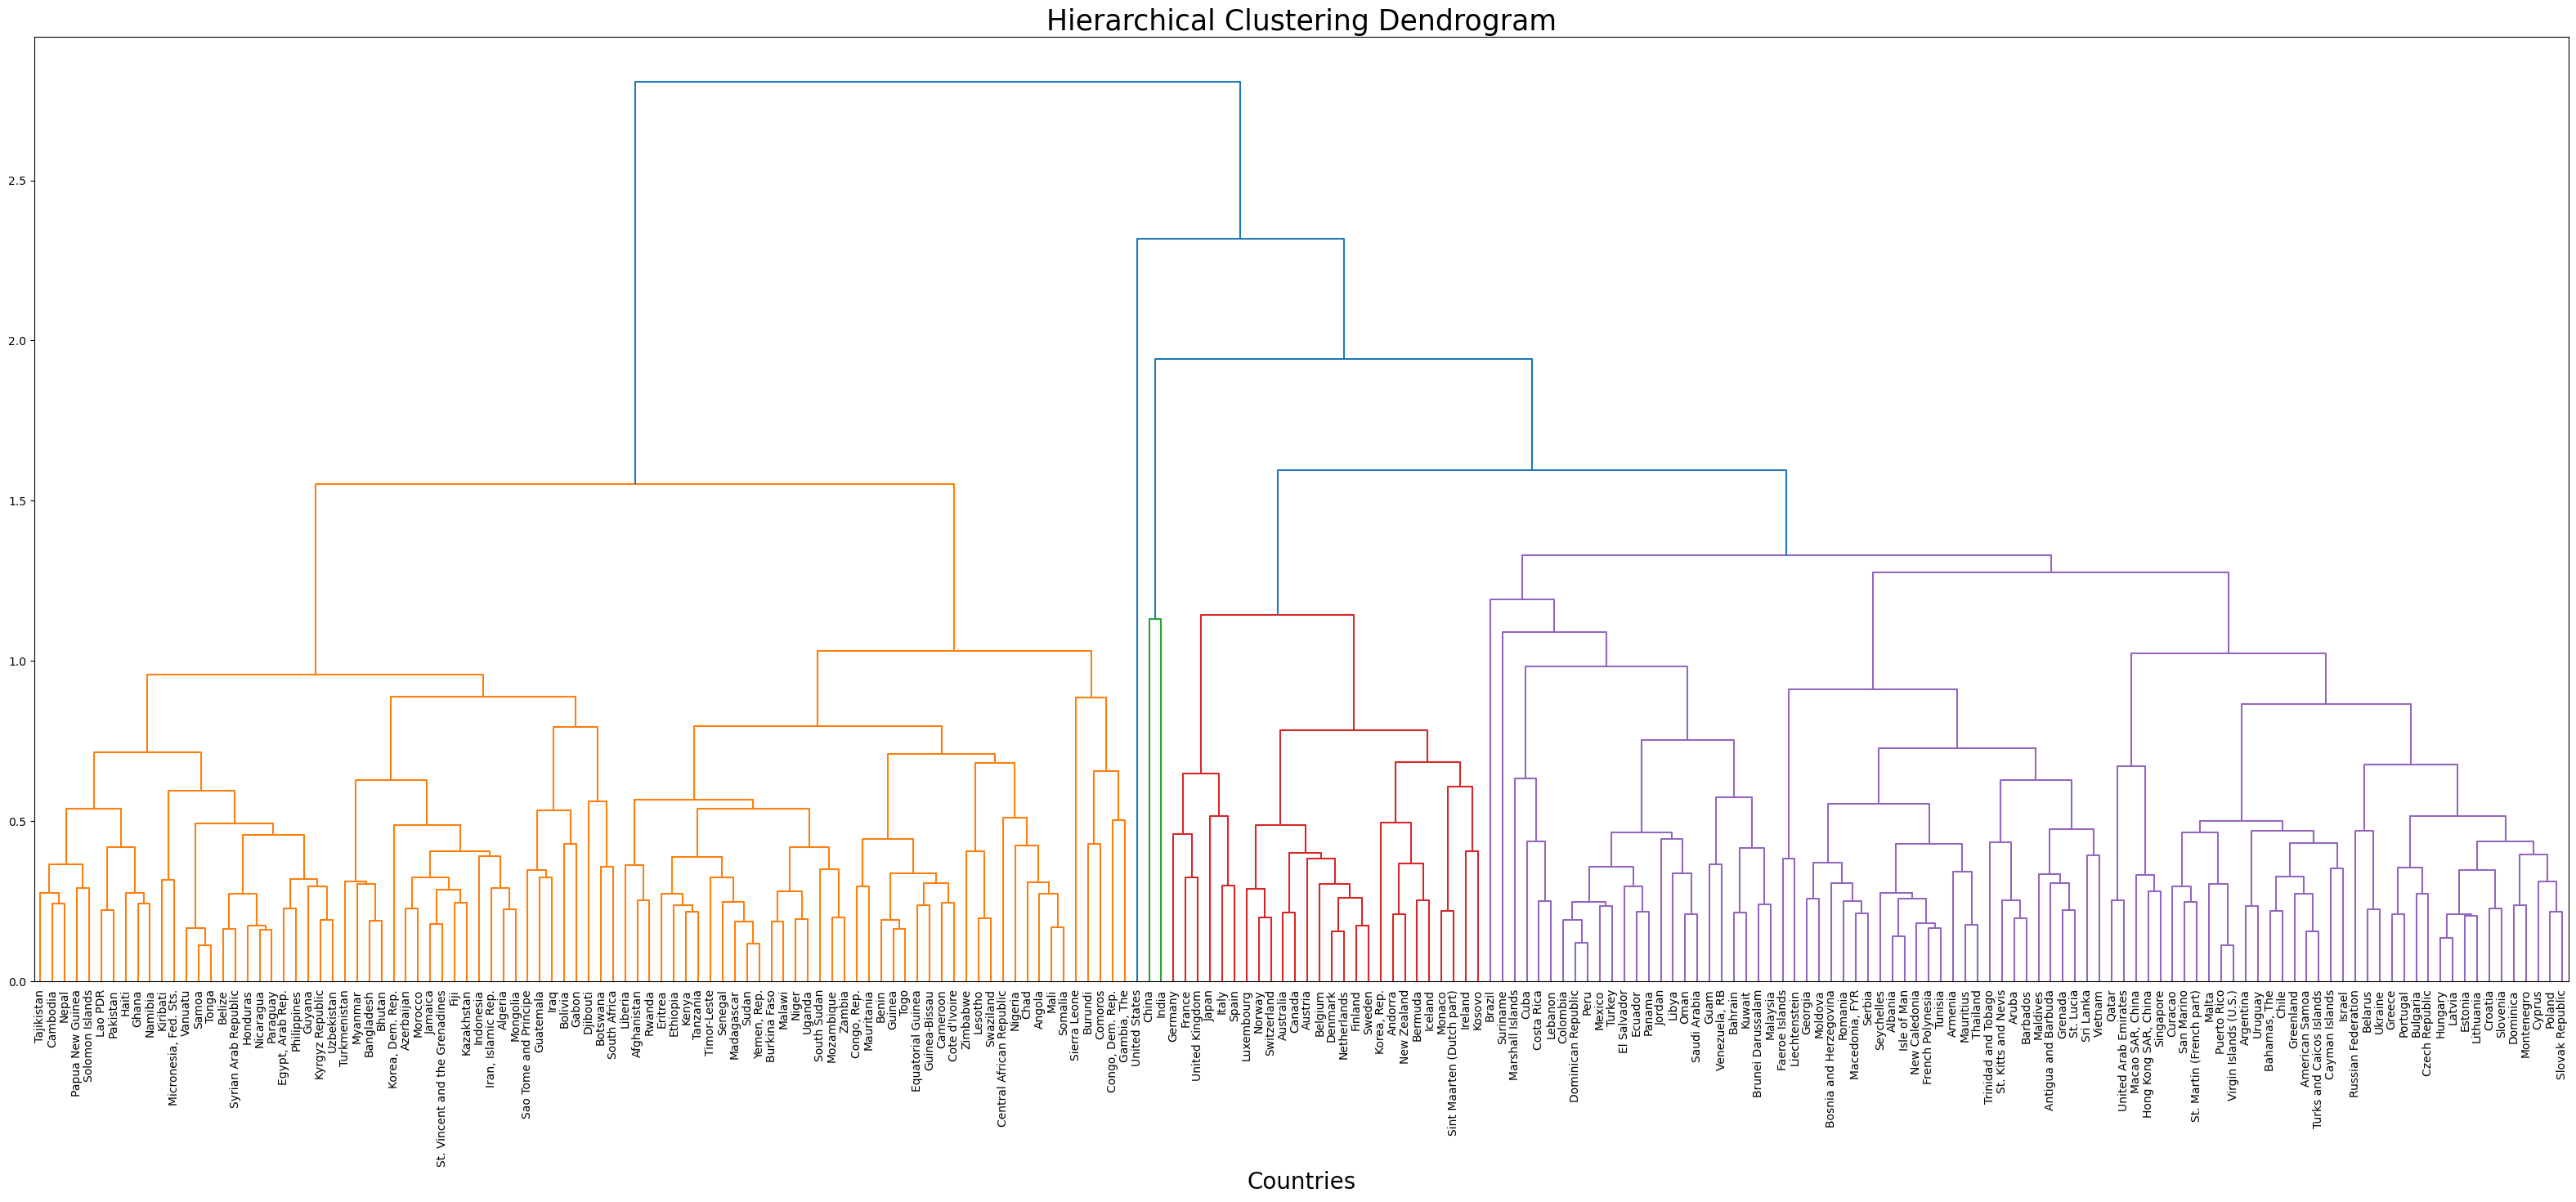

In [47]:
fig = plt.figure(figsize=(40,15))
plt.title('Hierarchical Clustering Dendrogram',fontsize=25)
plt.xlabel('Countries',fontsize= 20)
dendrogram = sch.dendrogram(sch.linkage(final_df.iloc[:,1:], method='complete'),orientation='top',labels=final_df.set_index('Country').index, leaf_font_size=10, color_threshold=sch.linkage(final_df.iloc[:,1:], method='complete')[-4, 2])
plt.show()
fig.savefig('Dendrogram.jpg',dpi=400)

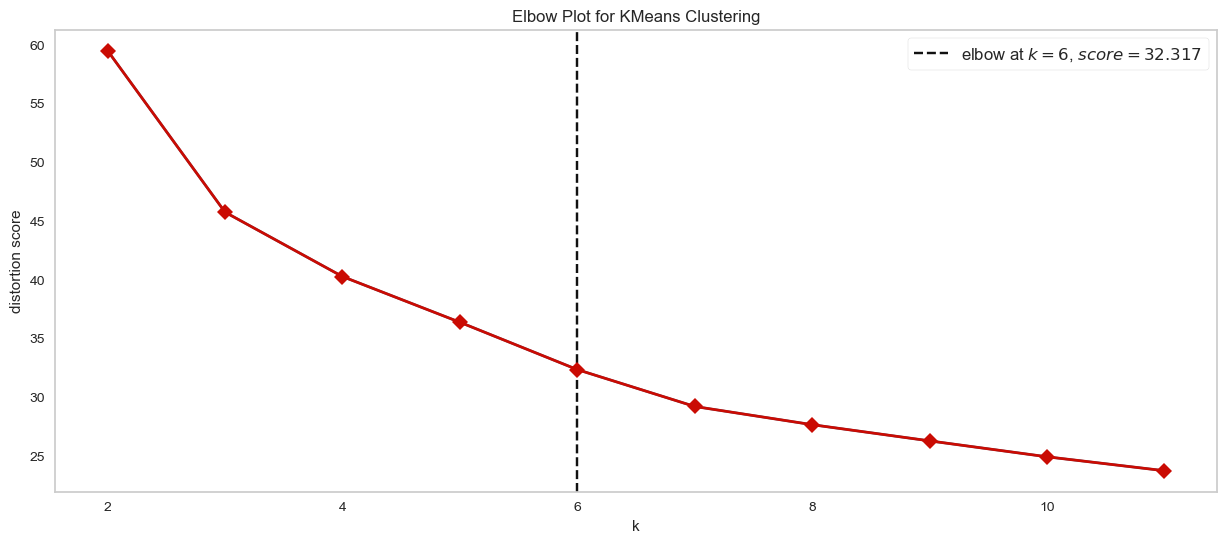

In [48]:
#!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++',random_state=42)
fig=plt.figure(figsize=(15,6))
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion', timings=False,title='Elbow Plot for KMeans Clustering',grid=False,color='red')
visualizer.fit(final_df.iloc[:,1:])
visualizer.ax.grid(False)
visualizer.ax.plot(visualizer.k_values_, visualizer.k_scores_, 'rD-', markersize=8, linewidth=2)
visualizer.show()

fig.savefig('Elbow.jpg')
plt.show()

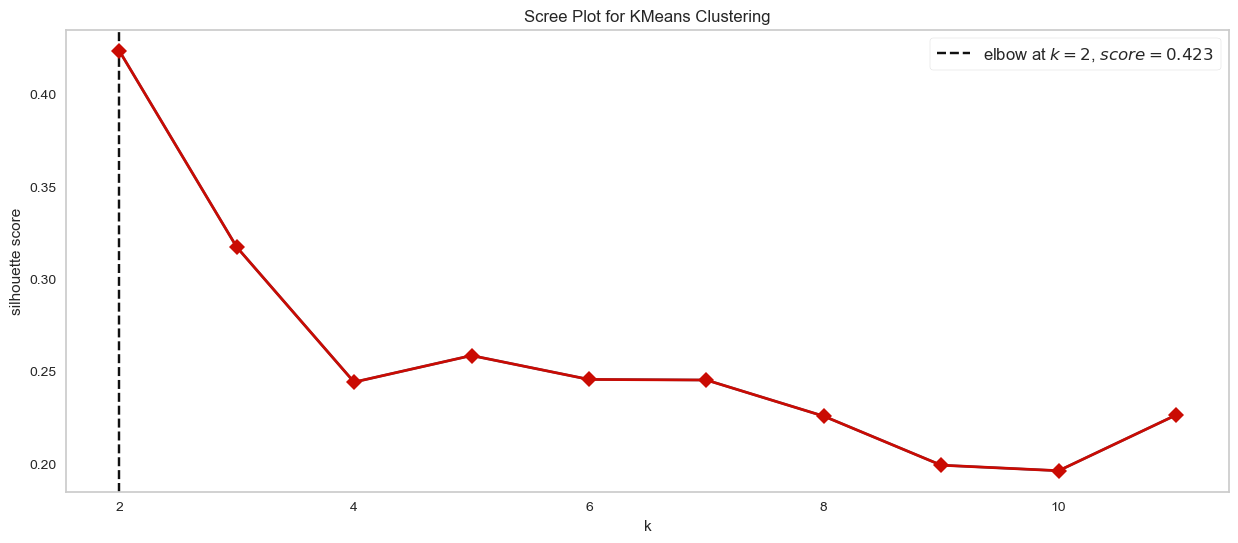

In [49]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++',random_state=42)
fig=plt.figure(figsize=(15,6))
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False,title='Scree Plot for KMeans Clustering',grid=False,color='red')
visualizer.fit(final_df.iloc[:,1:])
visualizer.ax.grid(False)
visualizer.ax.plot(visualizer.k_values_, visualizer.k_scores_, 'rD-', markersize=8, linewidth=2)
visualizer.show()

fig.savefig('K-Sil.jpg')
plt.show()

In [50]:
from sklearn.metrics import davies_bouldin_score
k_mean=KMeans(n_clusters=6, init='k-means++',random_state=42)
k_mean.fit(final_df.iloc[:,1:])
k_labels = k_mean.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))

silhouette_score : 0.2454625313727169  DB index: 1.236768835212509
 labels: {0, 1, 2, 3, 4, 5}


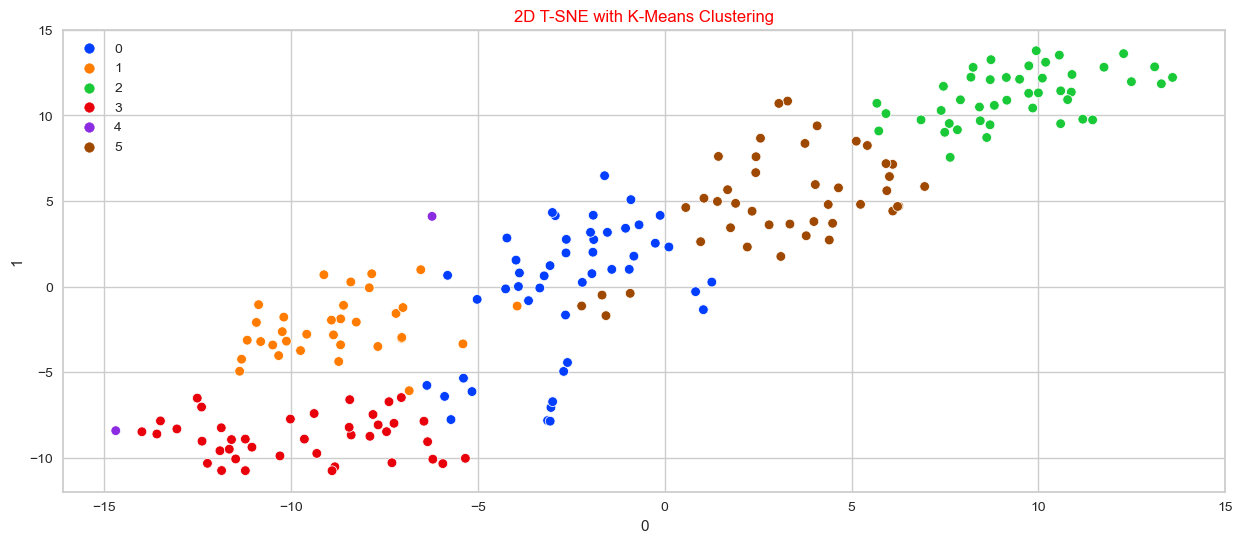

In [51]:
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with K-Means Clustering',fontdict={'color':'red'})
fig.savefig('Kmeans2D.jpg')
plt.show()

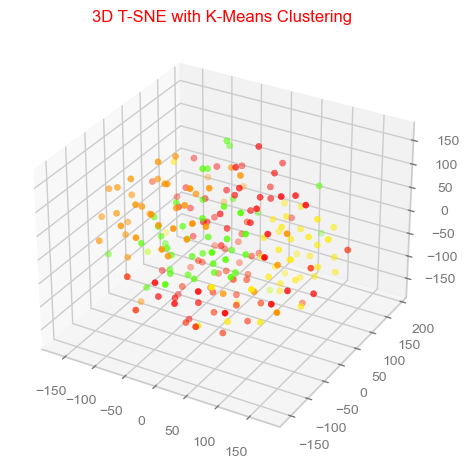

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne_3.iloc[:,0], data_tsne_3.iloc[:,1], data_tsne_3.iloc[:,2],c=k_labels,cmap='prism')
ax.tick_params(axis='both', colors='#777777')
plt.title('3D T-SNE with K-Means Clustering',fontdict={'color':'red'})
fig.savefig('kmeans_3d.jpg',dpi=400)
plt.show()

In [53]:
from sklearn.cluster import DBSCAN
# to find the optimal values of eps and min_sample
eps_list = np.linspace(start=0.2, stop=5, num=800)
silhouette_scores = []
for eps in eps_list:
    for j in range(2,20):
        dbscan = DBSCAN(eps=eps, min_samples=j)     
        labels = dbscan.fit_predict(final_df.iloc[:,1:])
        if 6>=len(np.unique(labels))>3:
            silhouette_avg = silhouette_score(final_df.iloc[:,1:], labels)
            silhouette_scores.append((silhouette_avg,eps,j,set(labels)))

print(max(silhouette_scores))


(0.13818596650453274, 0.3381727158948686, 12, {0, 1, 2, -1})


In [54]:
dbscan = DBSCAN(eps=0.3381727158948686, min_samples=12)     
d_labels = dbscan.fit_predict(final_df.iloc[:,1:])
print(silhouette_score(final_df.iloc[:,1:], d_labels))
print(set(d_labels))

0.13818596650453274
{0, 1, 2, -1}


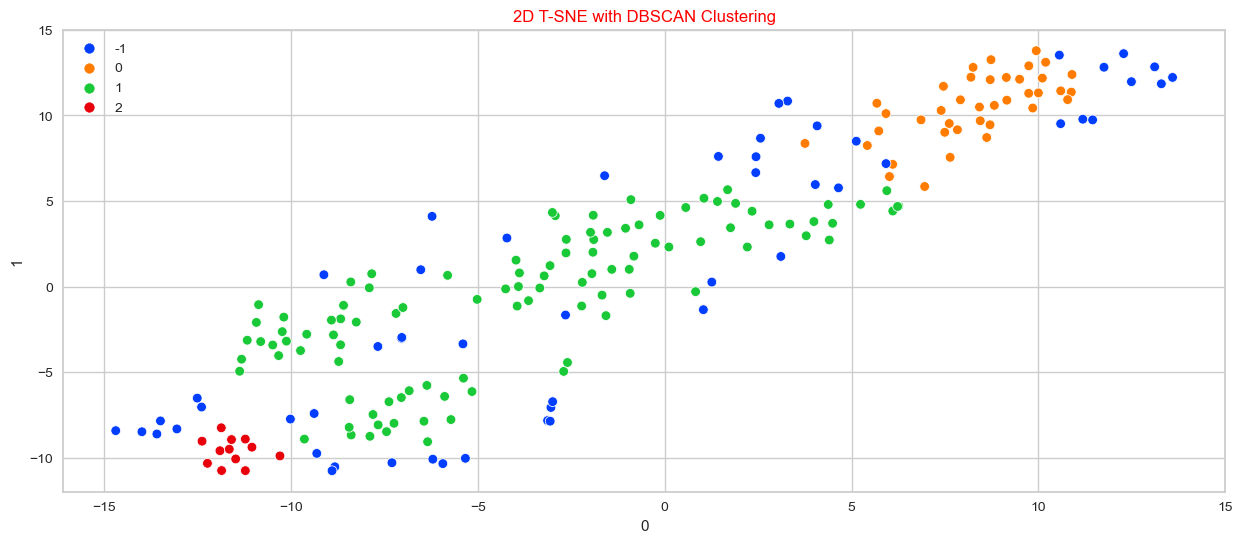

In [55]:
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=d_labels,palette='bright')
plt.title('2D T-SNE with DBSCAN Clustering',fontdict={'color':'red'})
plt.show()
fig.savefig('DBSCAN2D.jpg')

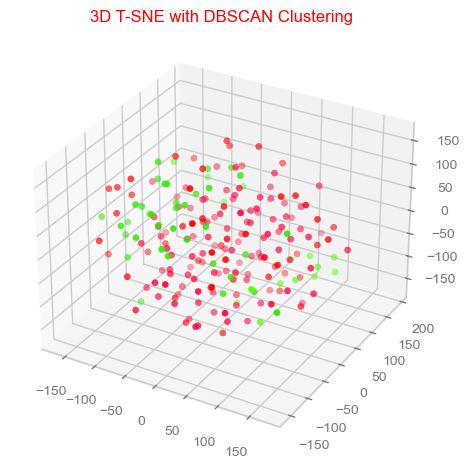

In [56]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne_3.iloc[:,0], data_tsne_3.iloc[:,1], data_tsne_3.iloc[:,2],c=d_labels,cmap='prism')
ax.tick_params(axis='both', colors='#777777')
plt.title('3D T-SNE with DBSCAN Clustering',fontdict={'color':'red'})
plt.show()
fig.savefig('DBSCAN3D.jpg',dpi=400)

In [57]:
Cluster_df = pd.DataFrame({'Country':final_df['Country'],
                              'H_Cluster_id':h_labels,
                              'K_Cluster_id':k_labels,
                              'DB_Cluster_id':d_labels})
Score_df = pd.DataFrame({'Clustering Model':['Hierarchial Clustering','KMeans Clustering','DBSCAN'],
                        'No.of. Clusters':['Four','Six','Three + Outliers'],
                        'Silhoutte Scores':[0.40041943185526235,0.2454625313727169,0.13818596650453274],
                        'Epsilon':['--','--',0.3381727158948686],
                        'Minimum Samples':['--','--',12]})

In [58]:
Cluster_df


Country  H_Cluster_id  K_Cluster_id  DB_Cluster_id
0              Afghanistan             1             2              0
1                  Albania             0             0              1
2                  Algeria             1             0              1
3           American Samoa             0             3              1
4                  Andorra             0             3              1
..                     ...           ...           ...            ...
203                Vietnam             0             0             -1
204  Virgin Islands (U.S.)             0             3              1
205            Yemen, Rep.             1             2              0
206                 Zambia             1             2              0
207               Zimbabwe             1             2             -1

[208 rows x 4 columns]

In [59]:
Score_df

Clustering Model   No.of. Clusters  Silhoutte Scores   Epsilon  \
0  Hierarchial Clustering              Four          0.400419        --   
1       KMeans Clustering               Six          0.245463        --   
2                  DBSCAN  Three + Outliers          0.138186  0.338173   

  Minimum Samples  
0              --  
1              --  
2              12

In [60]:
Cluster_df.to_csv('Cluster.csv',index=False)
Score_df.to_csv('Score.csv',index=False)

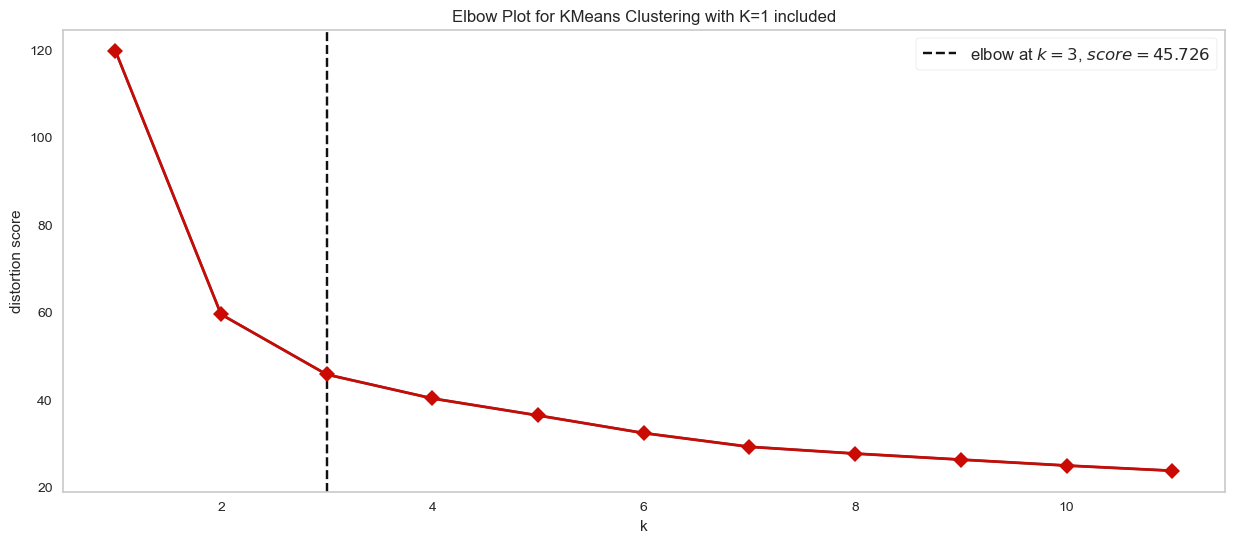

In [61]:
model = KMeans(init='k-means++',random_state=42)
fig=plt.figure(figsize=(15,6))
visualizer = KElbowVisualizer(model, k=(1,12), metric='distortion', timings=False,title='Elbow Plot for KMeans Clustering with K=1 included',grid=False,color='red')
visualizer.fit(final_df.iloc[:,1:])
visualizer.ax.grid(False)
visualizer.ax.plot(visualizer.k_values_, visualizer.k_scores_, 'rD-', markersize=8, linewidth=2)
visualizer.show()
fig.savefig('Elbow1.jpg')
plt.show()

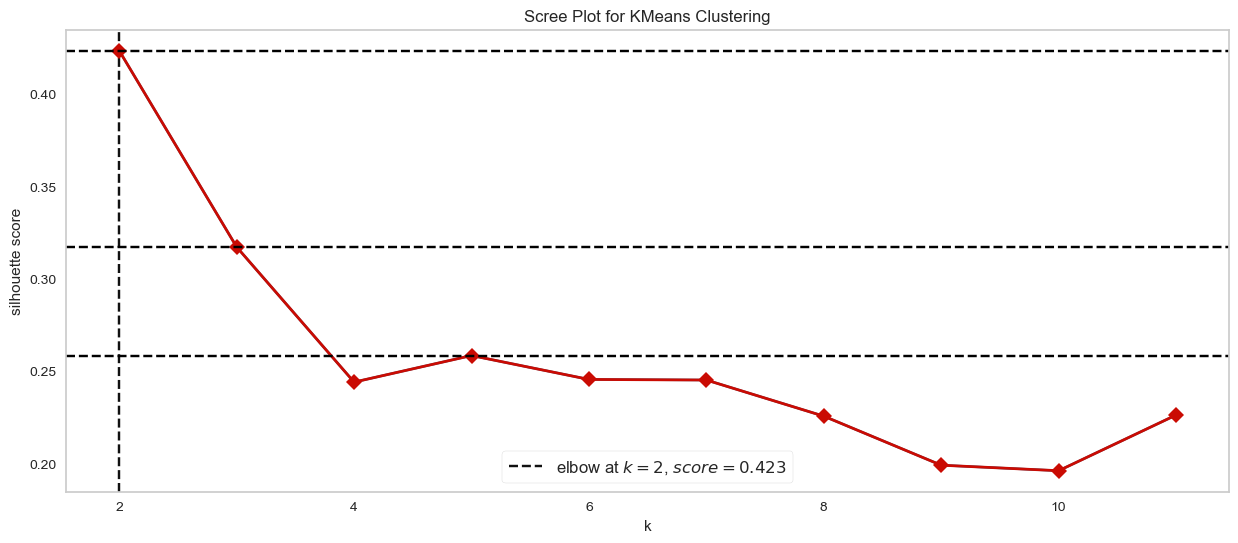

In [62]:
model = KMeans(init='k-means++',random_state=42)
fig=plt.figure(figsize=(15,6))
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False,title='Scree Plot for KMeans Clustering',grid=False,color='red')
visualizer.fit(final_df.iloc[:,1:])
visualizer.ax.grid(False)
visualizer.ax.plot(visualizer.k_values_, visualizer.k_scores_, 'rD-', markersize=8, linewidth=2)
visualizer.ax.axhline(y=visualizer.k_scores_[0],color='black',linestyle='--')
visualizer.ax.axhline(y=visualizer.k_scores_[1],color='black',linestyle='--')
visualizer.ax.axhline(y=visualizer.k_scores_[3],color='black',linestyle='--')
visualizer.show()

#fig.savefig('K-Sil1.jpg')
plt.show()

silhouette_score : 0.42344223915344636  DB index: 0.88445227494566
 labels: {0, 1}


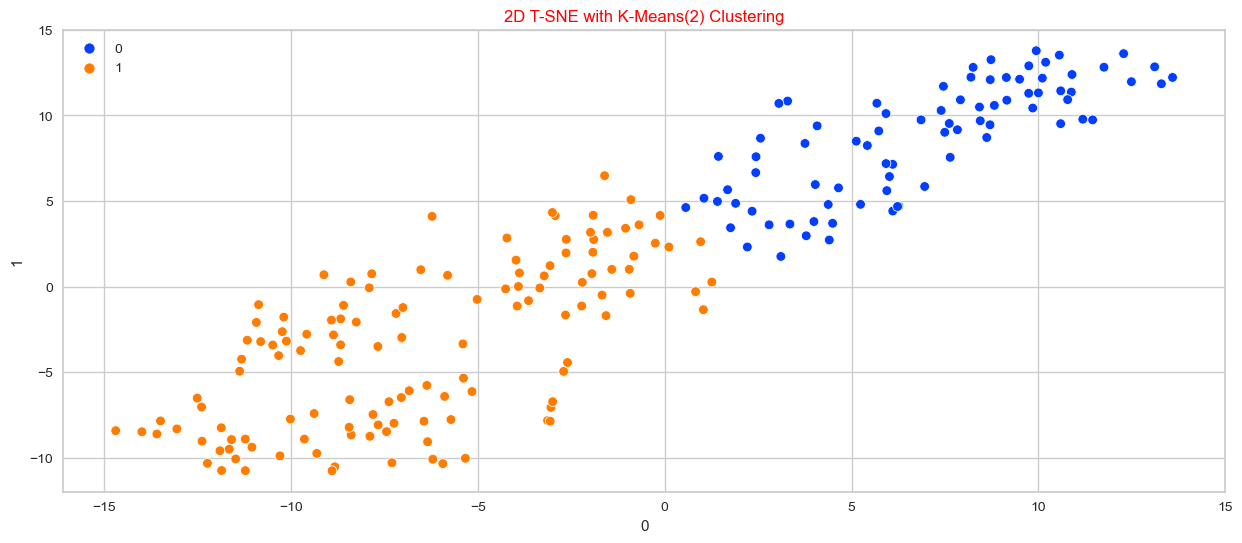

In [63]:
k_mean=KMeans(n_clusters=2, init='k-means++',random_state=42)
k_mean.fit(final_df.iloc[:,1:])
k_labels = k_mean.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with K-Means(2) Clustering',fontdict={'color':'red'})
fig.savefig('Kmeans(2).jpg')
plt.show()

silhouette_score : 0.3171703209333271  DB index: 1.1253678429808336
 labels: {0, 1, 2}


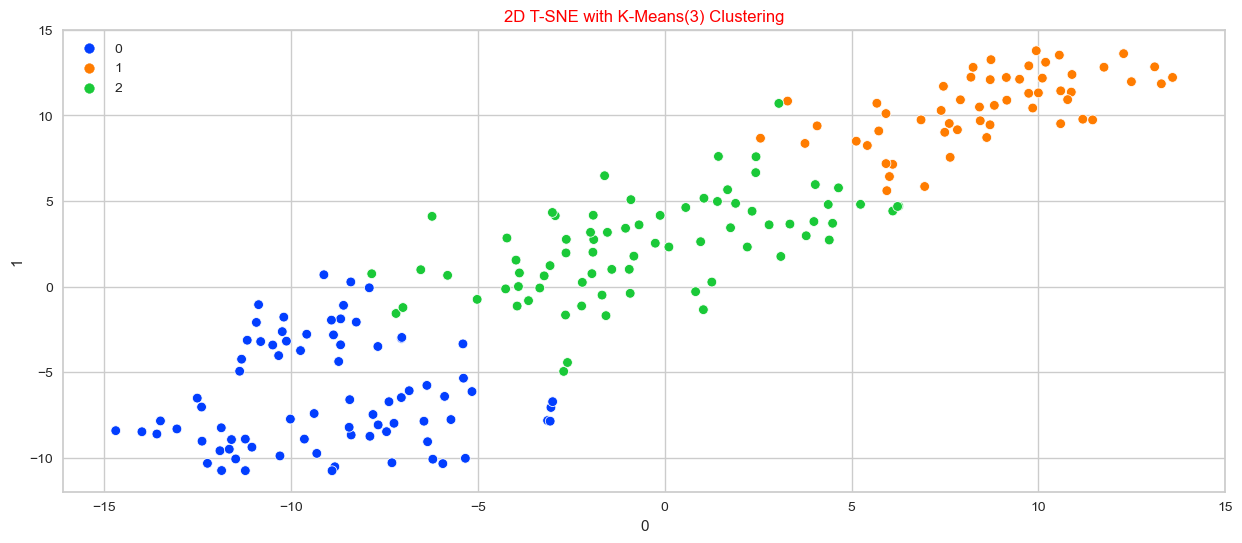

In [64]:
k_mean=KMeans(n_clusters=3, init='k-means++',random_state=42)
k_mean.fit(final_df.iloc[:,1:])
k_labels = k_mean.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with K-Means(3) Clustering',fontdict={'color':'red'})
fig.savefig('Kmeans(3).jpg')
plt.show()

silhouette_score : 0.24401492522375337  DB index: 1.337639928035079
 labels: {0, 1, 2, 3}


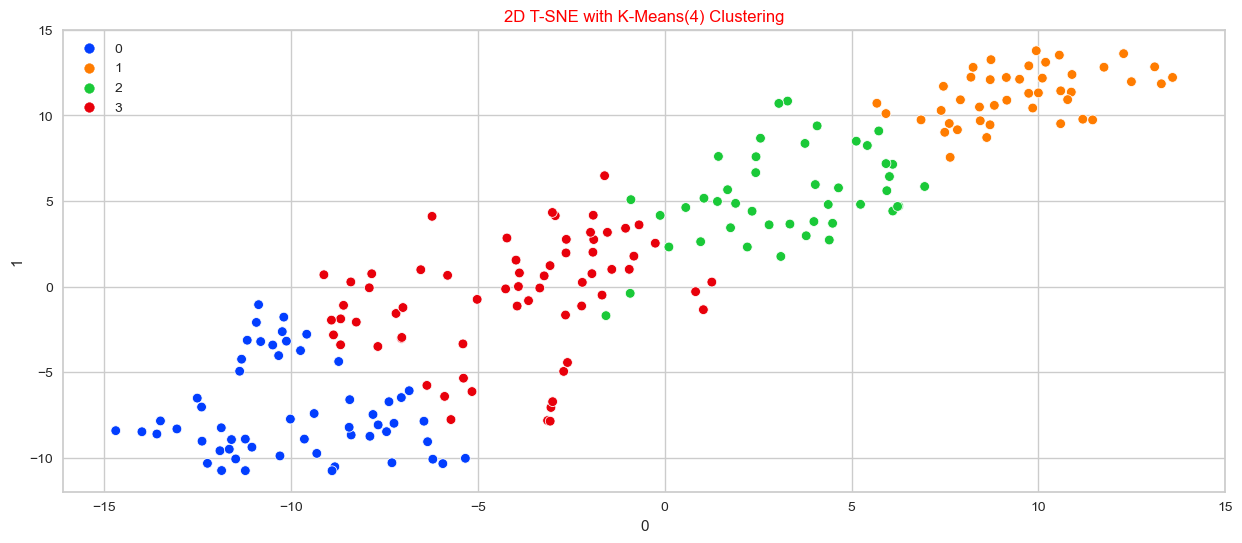

In [65]:
k_mean=KMeans(n_clusters=4, init='k-means++',random_state=42)
k_mean.fit(final_df.iloc[:,1:])
k_labels = k_mean.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with K-Means(4) Clustering',fontdict={'color':'red'})
fig.savefig('Kmeans(4).jpg')
plt.show()

silhouette_score : 0.2584066412105155  DB index: 1.1932728409213773
 labels: {0, 1, 2, 3, 4}


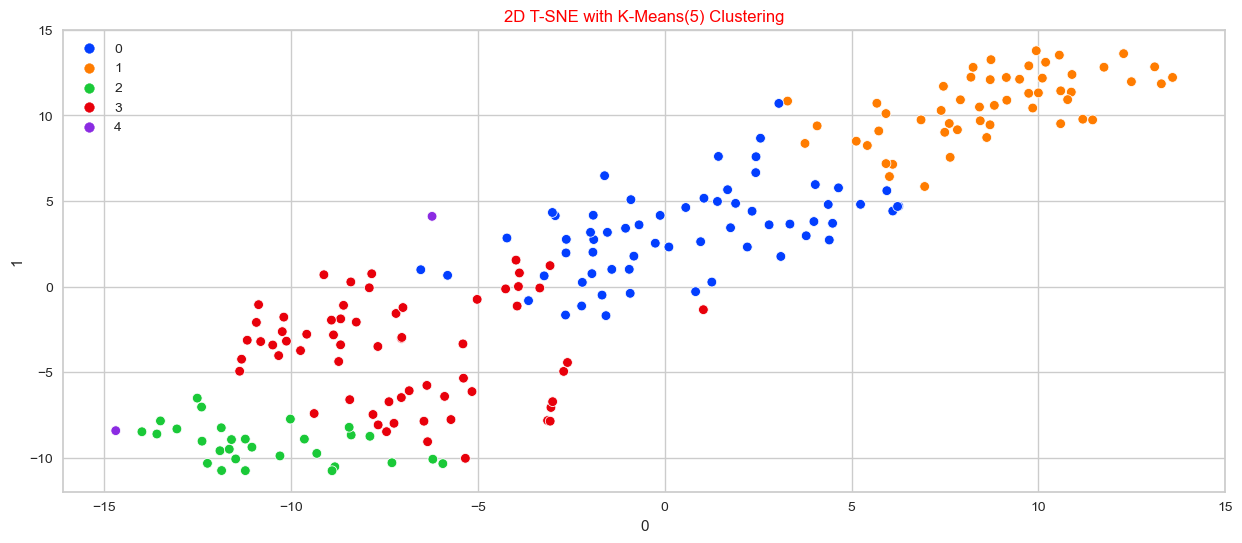

In [66]:
from sklearn.metrics import davies_bouldin_score
k_mean=KMeans(n_clusters=5, init='k-means++',random_state=42)
k_mean.fit(final_df.iloc[:,1:])
k_labels = k_mean.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with K-Means(5) Clustering',fontdict={'color':'red'})
fig.savefig('Kmeans(5).jpg')
plt.show()

silhouette_score : 0.2454625313727169  DB index: 1.236768835212509
 labels: {0, 1, 2, 3, 4, 5}


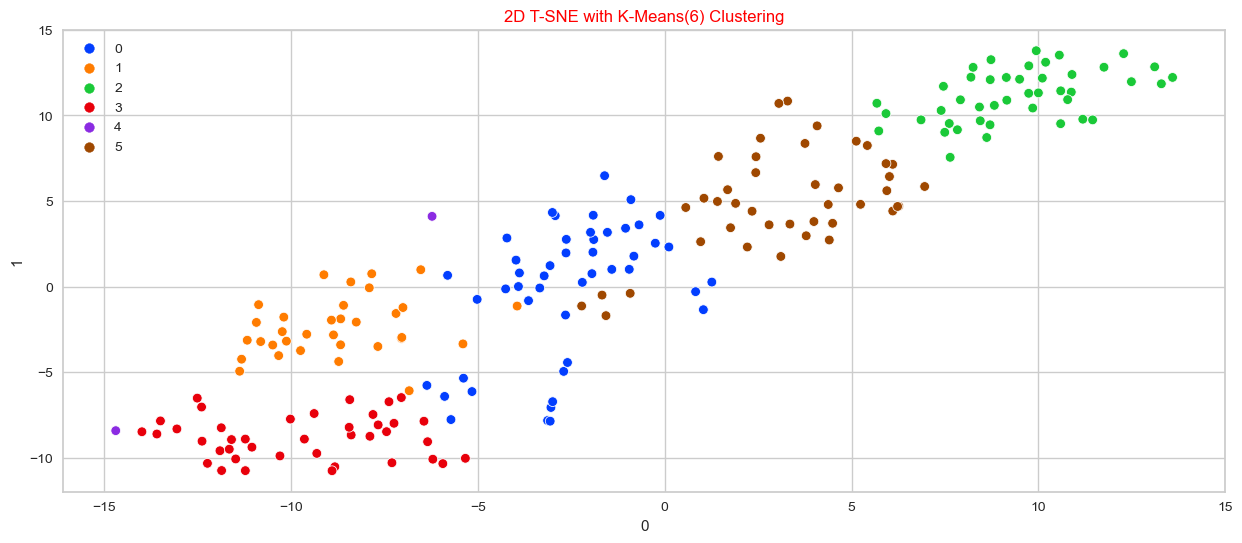

In [67]:
k_mean=KMeans(n_clusters=6, init='k-means++',random_state=42)
k_mean.fit(final_df.iloc[:,1:])
k_labels = k_mean.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with K-Means(6) Clustering',fontdict={'color':'red'})
fig.savefig('Kmeans(6).jpg')
plt.show()

In [68]:
from sklearn.model_selection import KFold

X = final_df.iloc[:,1:].values

# Define range of K values to test
k_range = range(2, 11)

# Initialize KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation scores and Mean Silhoutte scores
scores = []

msil = []

# Loop over K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Initialize lists to store fold scores and Silhoutte Scores for current K value
    fold_scores = []
    sil=[]
    
    # Loop over folds
    for train_index, test_index in kf.split(X):
        # Split data into training and test sets
        X_train, X_test = X[train_index], X[test_index]

        # Fit KMeans model on training set
        kmeans.fit(X_train)
        test_labels = kmeans.fit_predict(X_test)

        # Calculate Silhouette score for test set
        s_score = silhouette_score(X_test, test_labels)

        # Calculate sum of squared distances for test set
        sse = np.sum(np.square(kmeans.transform(X_test)), axis=1).mean()

        # Append fold score to list
        fold_scores.append(sse)
        
        # Append Silhouette and score to list
        sil.append(s_score)
        
    # Calculate mean score and mean silhotte score across all folds for current K value
    mean_score = np.mean(fold_scores)
    
    mean_sil = np.mean(sil)
    
    # Append mean score and mean silhoutte to list of scores
    scores.append(mean_score)
    
    msil.append(mean_sil)

In [69]:
K_score_df = pd.DataFrame({'No.of.clusters':np.arange(2,11),'Mean_WCSS':scores,'Mean_sil_scores':msil}).set_index('No.of.clusters')
K_score_df

Mean_WCSS  Mean_sil_scores
No.of.clusters                            
2                1.727398         0.425065
3                2.837166         0.323157
4                5.030216         0.307178
5                6.115863         0.268853
6                7.501550         0.269030
7                8.710678         0.269857
8               10.013369         0.256820
9               11.204478         0.255797
10              12.597733         0.236624

In [70]:
X = final_df.iloc[:,1:].values

# Define range of number of clusters to test
n_clusters_range = range(2, 11)

# Initialize KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store cross-validation scores
scores1 = []

# Loop over number of clusters
for n_clusters in n_clusters_range:
    # Initialize AgglomerativeClustering object with current number of clusters
    clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Initialize list to store fold scores for current number of clusters
    fold_scores = []

    # Loop over folds
    for train_index, test_index in kf.split(X):
        # Split data into training and test sets
        X_train, X_test = X[train_index], X[test_index]

        # Fit AgglomerativeClustering model on training set
        clustering.fit(X_train)

        # Calculate cluster labels for test set
        test_labels = clustering.fit_predict(X_test)

        # Calculate Silhouette score for test set
        s_score = silhouette_score(X_test, test_labels)

        # Append fold score to list
        fold_scores.append(s_score)

    # Calculate mean score across all folds for current number of clusters
    mean_score = np.mean(fold_scores)

    # Append mean score to list of scores
    scores1.append(mean_score)


In [71]:
H_score_df = pd.DataFrame({'No.of.clusters':np.arange(2,11),'Mean_sil_scores':scores1}).set_index('No.of.clusters')
H_score_df

Mean_sil_scores
No.of.clusters                 
2                      0.411868
3                      0.323870
4                      0.316368
5                      0.274026
6                      0.259118
7                      0.267023
8                      0.267110
9                      0.262943
10                     0.270117

silhouette_score : 0.3171703209333271  DB index: 1.1253678429808336
 labels: {0, 1, 2}


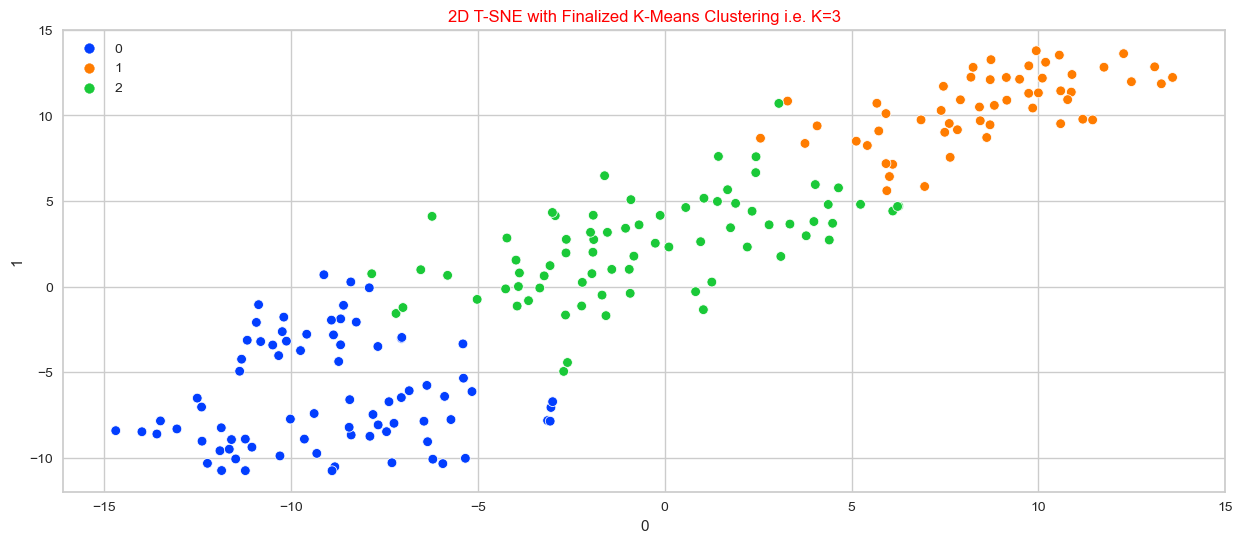

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , davies_bouldin_score
kmean_final=KMeans(n_clusters=3, init='k-means++',random_state=42)
kmean_final.fit(final_df.iloc[:,1:])
k_labels = kmean_final.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with Finalized K-Means Clustering i.e. K=3',fontdict={'color':'red'})
fig.savefig('Kmeansfinal.jpg')
plt.show() 

In [73]:
final_df['labels'] = k_labels
final_df.groupby('labels').agg(['mean']).reset_index()

labels Birth Rate Business Tax Rate CO2 Emissions Days to Start Business  \
               mean              mean          mean                   mean   
0      0   0.120978          0.097885      0.022432               0.031100   
1      1   0.660988          0.177217      0.001042               0.075141   
2      2   0.298830          0.101683      0.021483               0.061891   

  Energy Usage       GDP Health Exp % GDP Health Exp/Capita Hours to do Tax  \
          mean      mean             mean              mean            mean   
0     0.031373  0.034324         0.306309          0.248972        0.087055   
1     0.004851  0.001080         0.243450          0.007161        0.121909   
2     0.023972  0.011398         0.229095          0.027778        0.116731   

  Infant Mortality Rate Internet Usage Lending Interest  \
                   mean           mean             mean   
0              0.029858       0.559181         0.016181   
1              0.469601       0.039198         0.042307   
2              0.150493       0.205815         0.026765   

  Life Expectancy Female Life Expectancy Male Mobile Phone Usage  \
                    mean                 mean               mean   
0               0.865840             0.740333           0.348545   
1               0.383488             0.355103           0.112313   
2               0.737099             0.625231           0.241473   

  Population 0-14 Population 15-64 Population 65+ Population Total  \
             mean             mean           mean             mean   
0        0.183741         0.548396       0.515430         0.013083   
1        0.811067         0.173925       0.117660         0.014044   
2        0.466665         0.445313       0.231272         0.042153   

  Population Urban Tourism Inbound Tourism Outbound  
              mean            mean             mean  
0         0.755091        0.050427         0.075735  
1         0.292513        0.001336         0.002705  
2         0.475117        0.015763         0.018820

In [74]:
from dill import dump
dump(kmean_final,open('final_model.pkl','wb'))

In [ ]:
!streamlit run app.py